# Phase 1 (Preprocessing a qr code before decoding)

## Team members
* Khaled Mohamed Hassan 20P9978
* Adham Yasser Kassab 20P9705
* Habiba Yasser Abdelrazik 20P9595
* Omar Ali Sobhy 20P2084
* Osama Khaled Gamal 20P5486

## Imports

In [50]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import reedsolo as rs
import os
# from pyzbar.pyzbar import decode

## Plotting all the test cases and their histograms

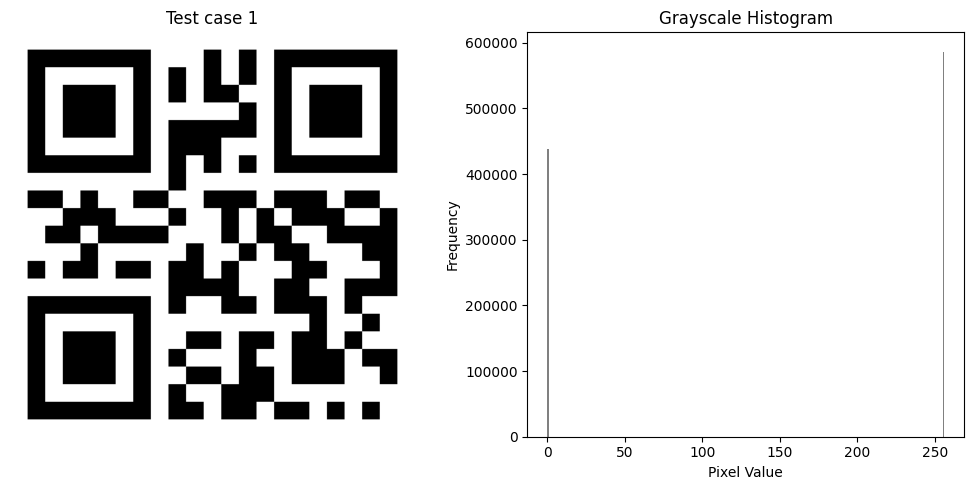

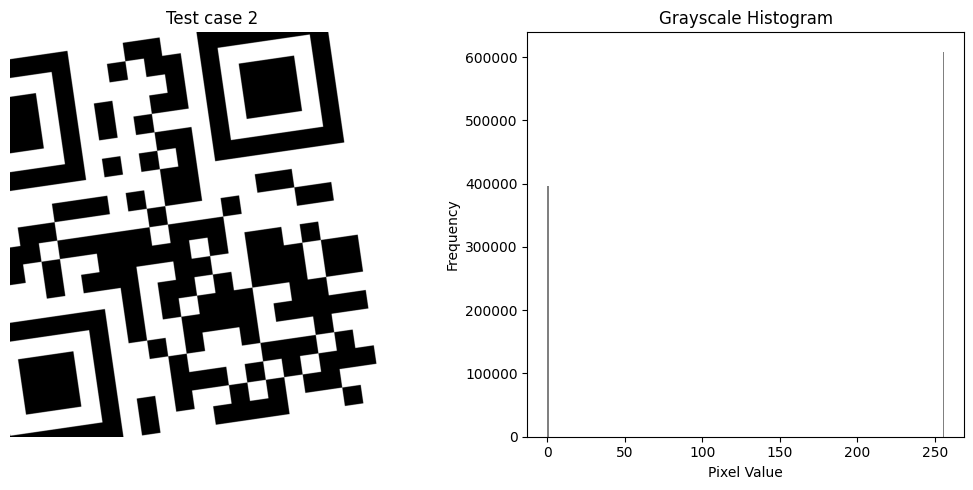

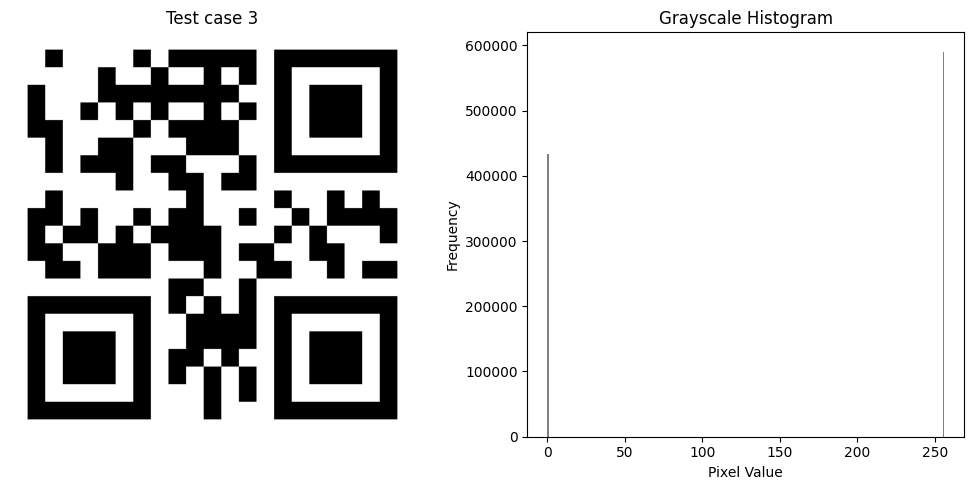

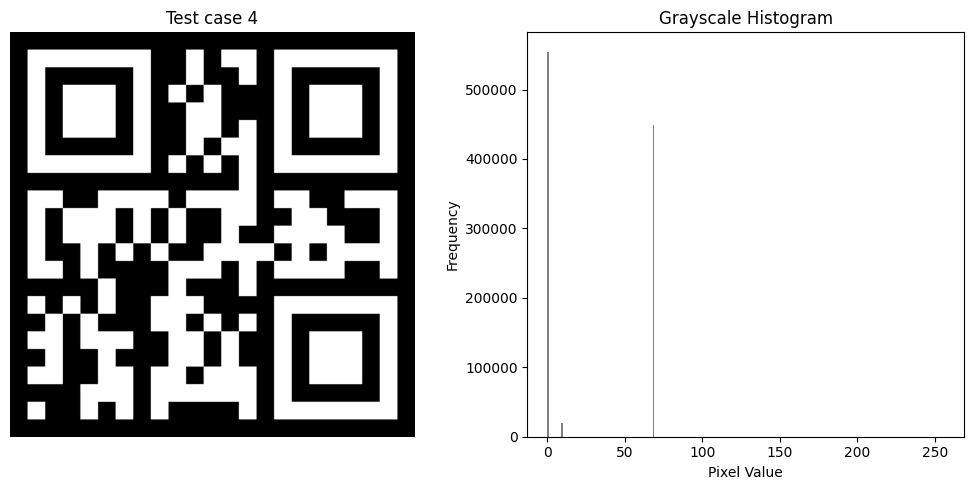

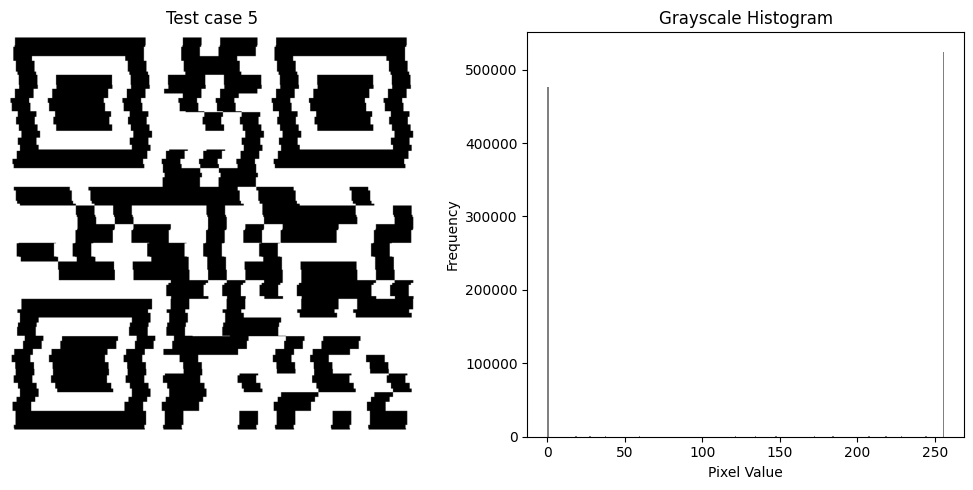

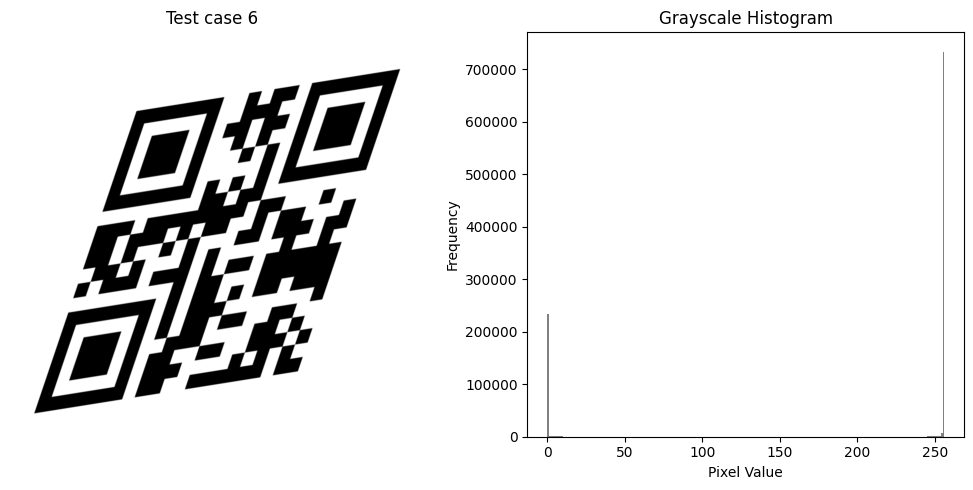

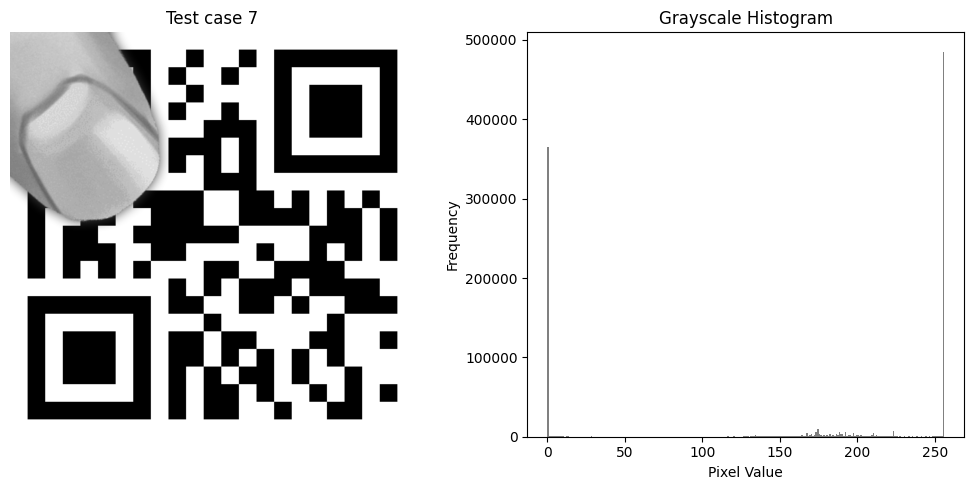

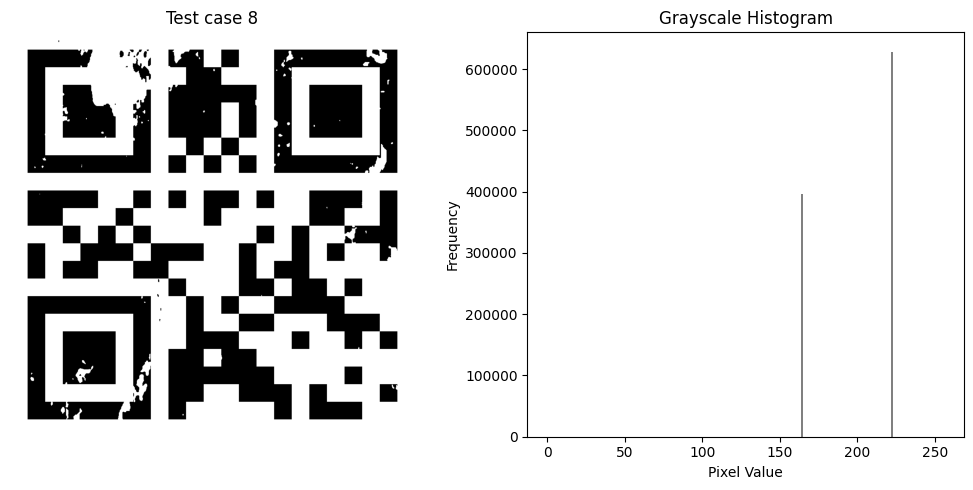

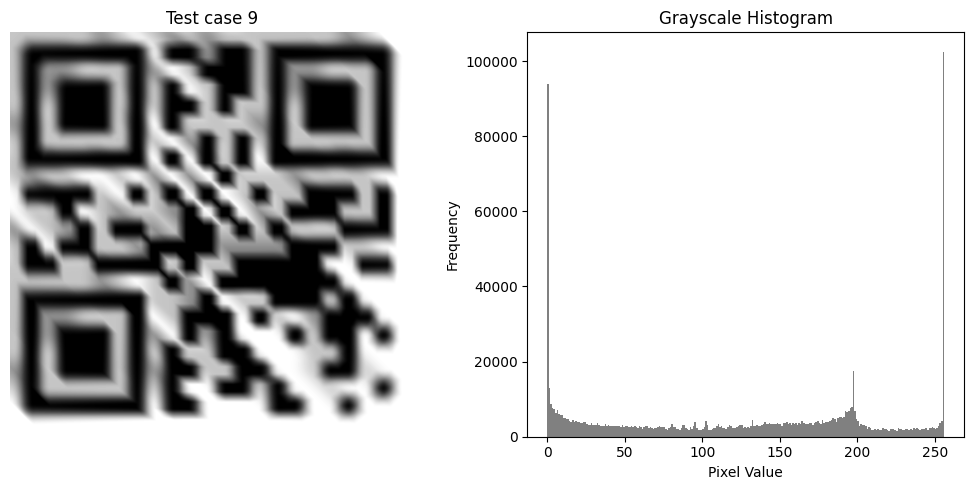

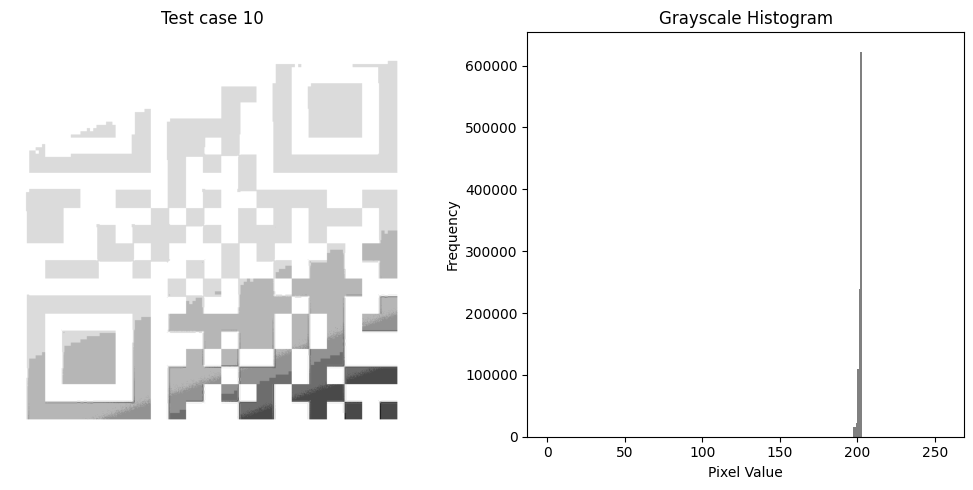

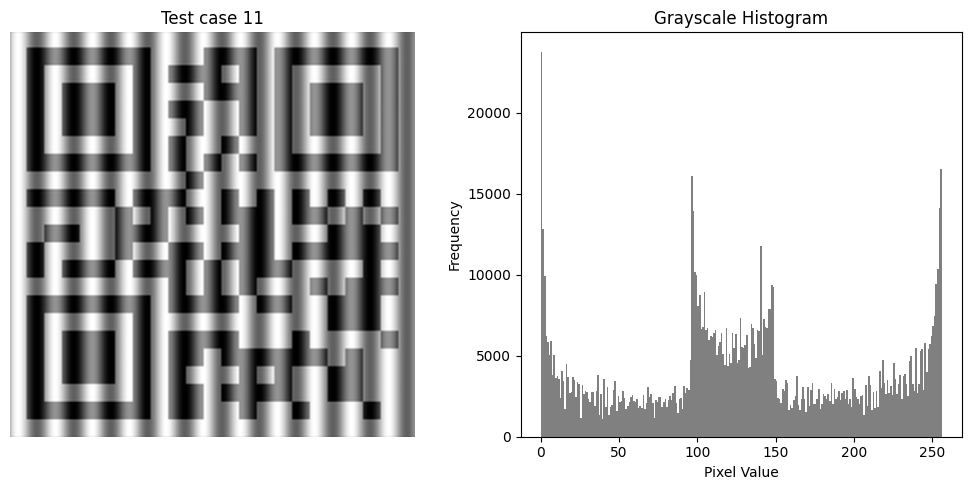

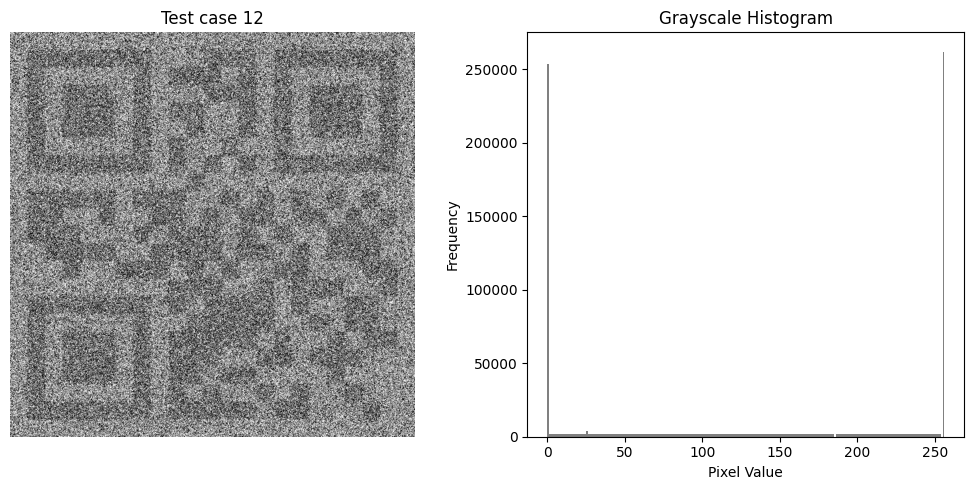

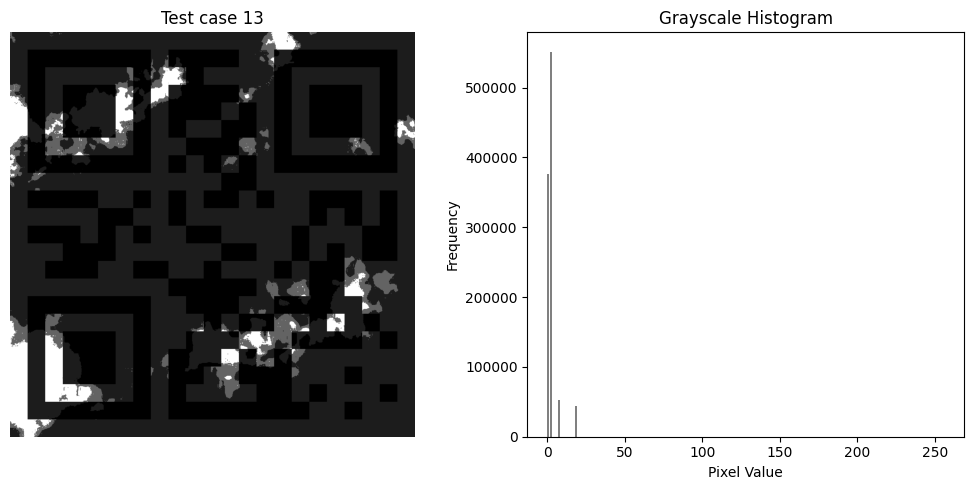

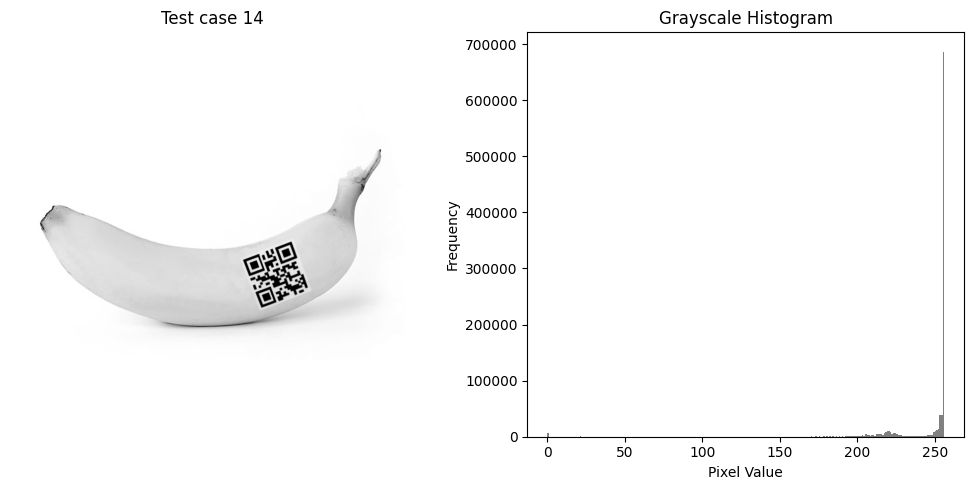

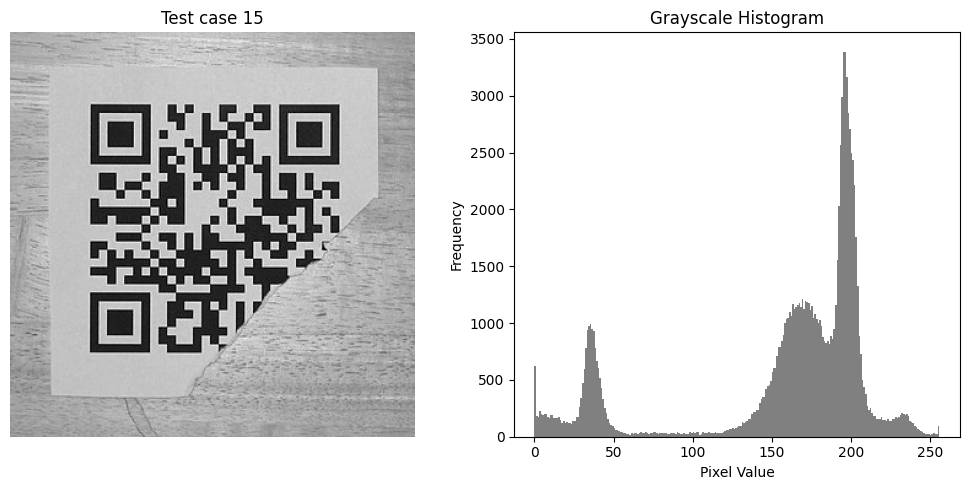

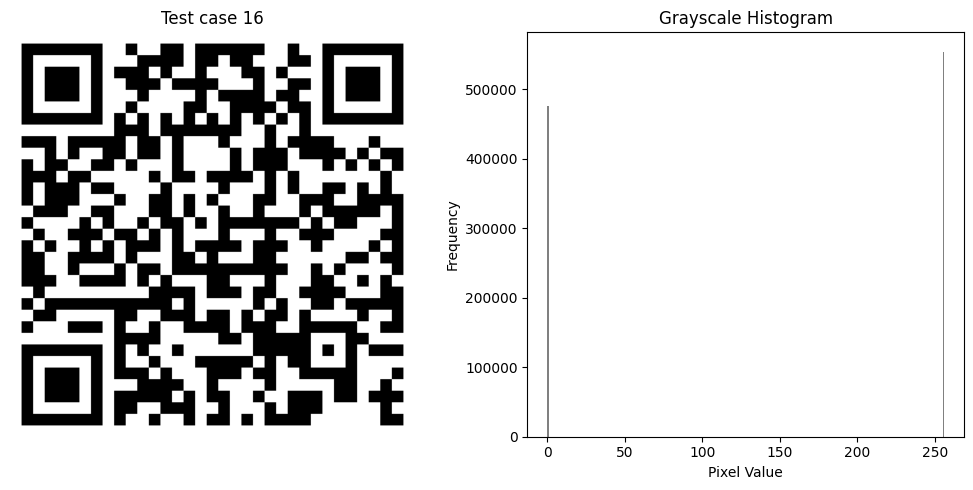

In [41]:
# Function to plot all the test cases and their histograms
def plot_all_test_cases(image_path, number):
    # Read the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Plot the image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Test case {number}')
    plt.axis('off')

    # Plot the histogram
    plt.subplot(1, 2, 2)
    plt.hist(img.ravel(), bins=256, range=[0, 256], color='gray')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title('Grayscale Histogram')

    # Show the plot
    plt.tight_layout()
    plt.show()

# # List of QR code image paths
qr_images = [
    'images/01-Getting-started.png', 'images/02-Matsawar-3edel-ya3am.png','images/03-Leffy-bina-ya-donya.png', 'images/04-Black-mirror.png','images/05-Caesar-cipher.png','images/06-Railfence-cipher.png', 'images/07-THE-MIGHTY-FINGER.png', 'images/08-Compresso-Espresso.png','images/09-My-phone-fell-while-taking-this-one-...-or-did-it.png', 'images/10-Gone-With-The-Wind.png', 'images/11-weewooweewooweewoo.png', 'images/12-mal7-w-felfel.png', 'images/13-2el-noor-2ata3.png', 'images/14-BANANAAA!!!.png', 'images/15-beast-mode-computer-vision-(this-one-is-from-wikipedia).jpg', 'images/16-V3-QR-Code...-can-you-do-it.png'
             ]

# Plot each QR code and its histogram
count = 1
for qr_image in qr_images:
    plot_all_test_cases(qr_image, count)
    count = count + 1


## Defining general functions to use in all code

### Global Variable

In [3]:
# Base Centroid #
# Holds the centroid of the first image as a refrence
base_centroid = None

### Plotting functions

In [4]:
# Function to read an image and plot its histogram
def plot_image_and_histogram(image_path):
    # Read the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Plot the image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('QR Code Image')
    plt.axis('off')

    # Plot the histogram
    plt.subplot(1, 2, 2)
    plt.hist(img.ravel(), bins=256, range=[0, 256], color='gray')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title('Grayscale Histogram')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Function to take a dictionary of images and plot them and their histograms
def plot_all_needed_images(dict_img):
    # iterating through the dictionary and plotting each needed image along with it's histogram
    for key in dict_img:
        img = dict_img[key]
        # Plot the image
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'{key}')
        plt.axis('off')

        # Plot the histogram
        plt.subplot(1, 2, 2)
        plt.hist(img.ravel(), bins=256, range=[0, 256], color='gray')
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')
        plt.title('Grayscale Histogram')

        # Show the plot
        plt.tight_layout()
        plt.show()

### Finding centroid of shapes

In [5]:
def find_centroid(contour):
    # Finds the centroid of a contour #
    M = cv2.moments(contour)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    return cx,cy

### Rotation functions

In [6]:
def find_point_with_yMax (cont):
    # Finding the bottom right point #
    max_y = 0
    max_point = None
    for point in cont:
        if point[0] > max_y:
            max_y = point[0]
            max_point = point
    return max_point
def find_point_with_xMminYMax (cont):
    # Finding the top right point #
    min_x = 9999
    min_points = []
    for point in cont:
        if point[1] <= min_x:
            min_x = point[1]
            min_points.append(point) 
    return find_point_with_yMax(min_points)
def find_angle(vec):
    #Find angle between the vector and the y-axis#
    y_axis = np.array([0, 1])

    # Calculate the dot product
    dot_product = np.dot(vec, y_axis)

    # Calculate the magnitudes of the vectors
    magnitude1 = np.linalg.norm(vec)
    magnitude2 = np.linalg.norm(y_axis)

    # Calculate the cosine of the angle between the 2 lines
    cosine_angle = dot_product / (magnitude1 * magnitude2)

    # Calculate the angle in degrees
    return (np.arccos(cosine_angle) * 180 / np.pi)
def rotate_img_clockwise(img, angle):
    h,w = img.shape[:2]
    # Calculate the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((w / 2, h / 2), -angle, 1)
    # Perform the rotation
    return (cv2.warpAffine(img, rotation_matrix, (w, h), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255)))

### Getting Hough lines

In [7]:
def get_hough(img):
    # Find the Hough transfrom of the image #
    
    # Apply Canny edge detection 
    edges = cv2.Canny(img, 50, 150)
    # Apply Hough transfrom
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=30, minLineLength=50, maxLineGap=190)
    # Draw Hough lines on a black mask and return it
    mask = np.zeros_like(img)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(mask, (x1, y1), (x2, y2), (255, 255, 255), 2)
    return mask

### Getting Contour

In [8]:
def get_contour(houghImg):
    # Find the exact and approximate contour of the qr code #

    # Find contours in the hough image
    contours, _ = cv2.findContours(houghImg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Filter contours that have 4 edge points and max area
    max_area = 0
    selected_contour_exact = None
    selected_contour_appx = None

    for contour in contours:
        epsilon = 0.1 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        if len(approx) == 4:  
            # Calculate the area of the contour
            area = cv2.contourArea(contour)
            if area > max_area:
                max_area = area
                selected_contour_exact = contour
                selected_contour_appx = approx
    return (selected_contour_exact, selected_contour_appx)

### Shifting perspective

In [147]:
def shift_perspective(img, contour, target_verticies):

    w,h = img.shape[:2]
    
    #   Original verticies from the contour
    bottom_left, top_left, top_right, bottom_right = contour.reshape(-1, 2)
    original_verticies = np.array([bottom_left, top_left, top_right, bottom_right], dtype= np.float32)

    # Apply prespective transfrom
    perspective_transform_matrix = cv2.getPerspectiveTransform(original_verticies, target_verticies)
    return (cv2.warpPerspective(img, perspective_transform_matrix, (w, h), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255)))

### Translation functions

In [10]:
def translate_to_middle(img, contour, tolerance_x=0, tolerance_y=0):
    # Translate the image to the middle of the frame #

    # Centroid of base image is right at the middle, Whiler Centroid of the #
    # current image is not, thus tolerance is added to correct this difference # 

    h,w = img.shape[:2]
    # Find img centroid
    old_centroid = find_centroid(contour=contour)
    # Find the translation matrix to the base centroid
    tx = base_centroid[0] - old_centroid[0] + tolerance_x
    ty = base_centroid[1] - old_centroid[1] + tolerance_y
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    # Translate the image
    return (cv2.warpAffine(img, translation_matrix, (w, h), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255)))

## Test cases

### Test case 01

#### What this case needs?
* Case 01 is a clean and correctly aligned so we can compare it and its histogram to the rest of the test cases.

#### What was done?
* Here we used our 'get_contour' function to detect the outer outline around the qr code.

#### What could be improved?
* Currently this case is already ready for decoding

(503, 503)


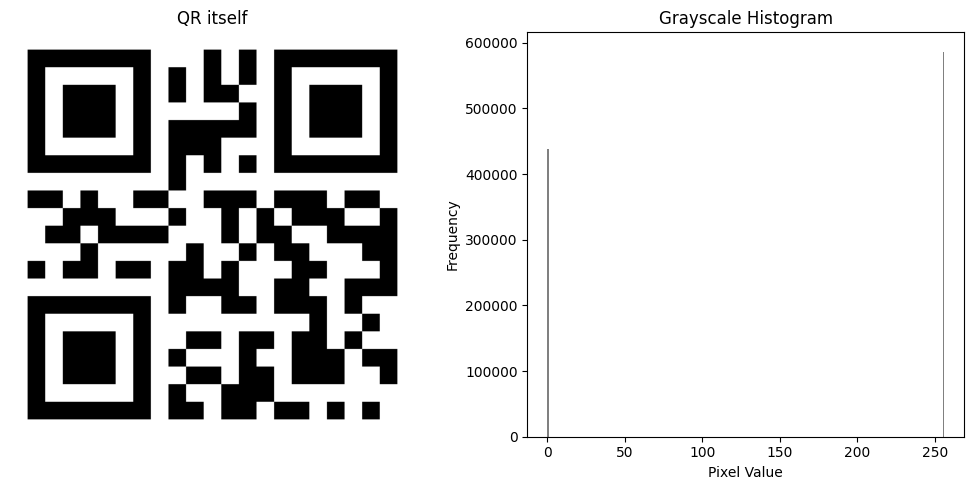

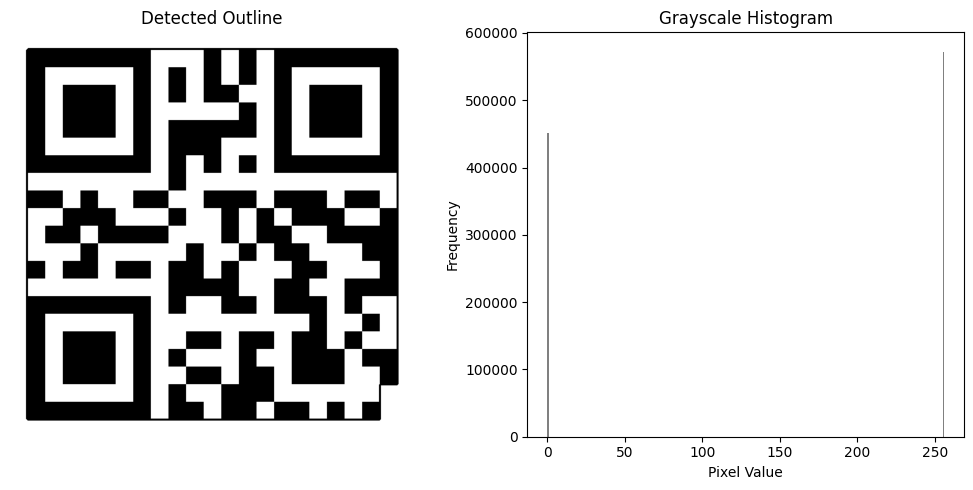

In [62]:
# Testcase 1 #
def tc01_preprocessing(original_img):
    
    # Find hough
    hough_lines_1 = get_hough(original_img)
    # Find contours
    exact,appx = get_contour(hough_lines_1)
    # Find base centroid
    global base_centroid
    base_centroid = find_centroid(exact)
    # Draw contour
    cont_img = original_img.copy()
    if exact is not None:
        cv2.drawContours(cont_img, [exact], -1, (0, 0, 0), 4)
    # Construnct the printing dictionary
    printing_dict = {
        'QR itself': original_img,
        'Detected Outline' : cont_img,
    }
    return printing_dict

img_1 = cv2.imread('images/01-Getting-started.png', cv2.IMREAD_GRAYSCALE)
dict_1 = tc01_preprocessing(img_1)
plot_all_needed_images(dict_1)

### Test case 02

#### What this case needs?
* Case 02 is a bit messy.
* First, it is rotated at an agle we are yet to deduce.
* Second, it is cut short so we have a significant amount of data that maybe lost.
* This case needs to be rotated, translated to the right, and it needs to have it finder pattern filled.

#### What was done?
* Here we detected the outline.
* Then we rotated the image.
* Then we translated the image to the right.

#### What could be improved?
* This case is yet to be filled so we can have an appropriate finder pattern.

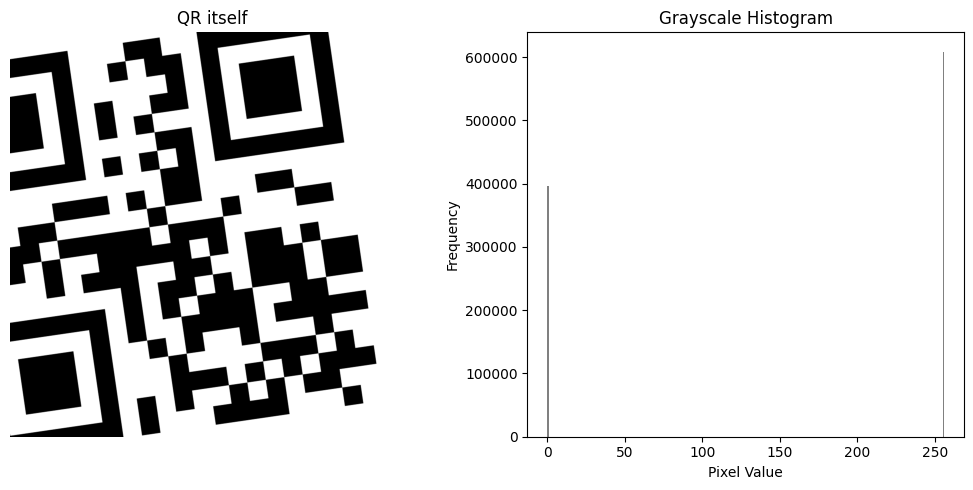

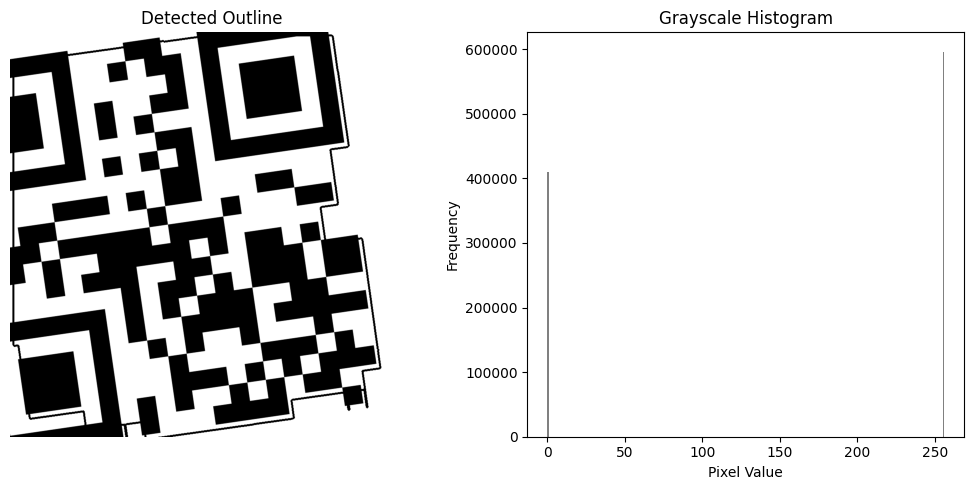

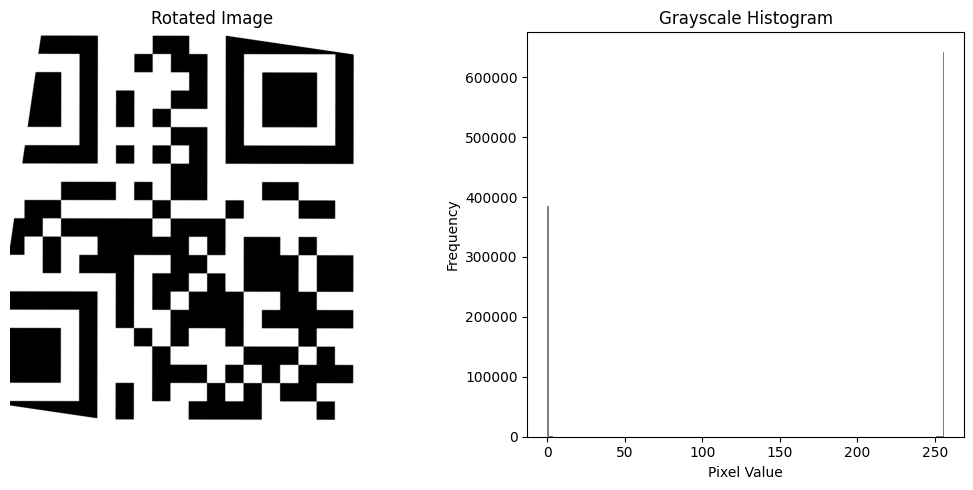

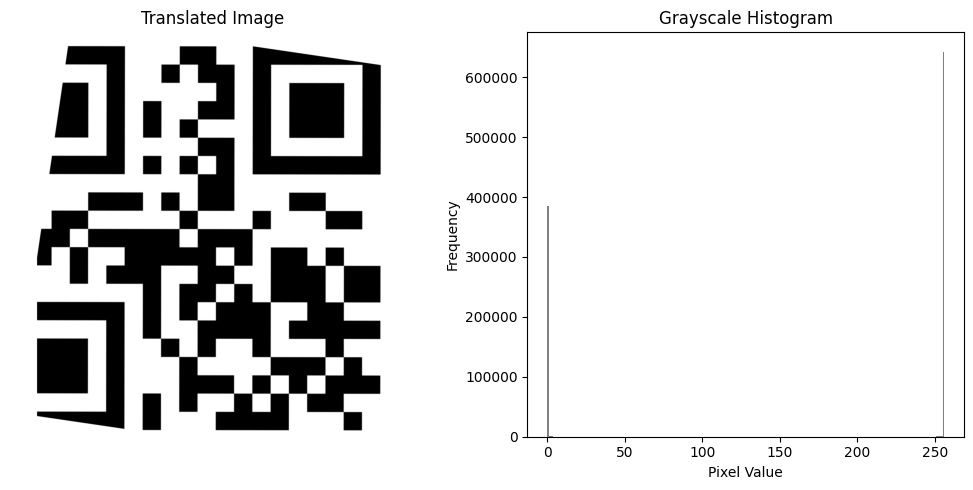

In [52]:
# Testcase 2 #
def tc02_preprocessing(original_img):
    
    # Pad the image so we can draw complete lines in the hough transform
    padding = 10
    padded_img = cv2.copyMakeBorder(original_img, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=(255,255,255))
    # Find Hough
    hough_lines_2 = get_hough(padded_img)
    # Find Contour
    exact,appx = get_contour(hough_lines_2)
    # Draw contour
    cont_img = original_img.copy()
    if exact is not None:
        cv2.drawContours(cont_img, [exact], -1, (0, 0, 0), 4)
    # Find angle between contour side and y-axis 
    p1 = find_point_with_xMminYMax(exact.reshape(-1, 2))
    p2 = find_point_with_yMax(exact.reshape(-1, 2))
    vector = p2-p1
    angle = find_angle(vector) # 8.38 degrees
    # Rotate the image
    rotated_img = rotate_img_clockwise(padded_img, angle)
    # Translate the image
    translated_img = translate_to_middle(rotated_img, exact, tolerance_y= 30)
    # Construct the printing dictionary
    printing_dict = {
        'QR itself': original_img,
        'Detected Outline' : cont_img,
        'Rotated Image' : rotated_img,
        'Translated Image' : translated_img
    }

    return printing_dict

img_2 = cv2.imread('./images/02-Matsawar-3edel-ya3am.png', cv2.IMREAD_GRAYSCALE)
dict_2 = tc02_preprocessing(img_2)
plot_all_needed_images(dict_2)

### Test case 03

#### What this case needs?
* Case 03 has one main problem which is misalignment.
* This means that the finder patterns are not in their appropriate corners.
* This case needs to be rotated so that the finder patterns are back in their appropriate corners.

#### What was done?
* Here we detected the outline.
* Then we drew the contour around it.
* Then we rotated the image as needed.

#### What could be improved?
* The rotation angle in this case is manually written which is not the best thing to do.
* We'll try to make the function automatically detect the skew angle then rotate the qr by that angle.

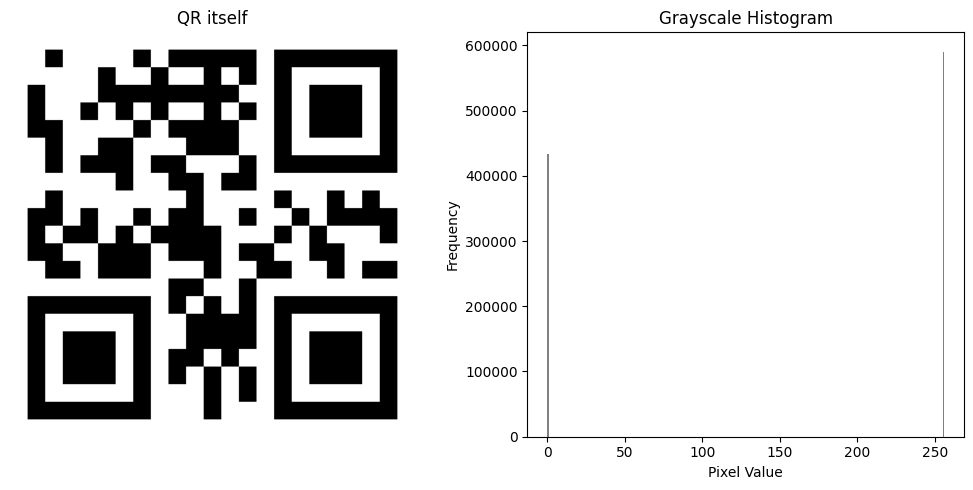

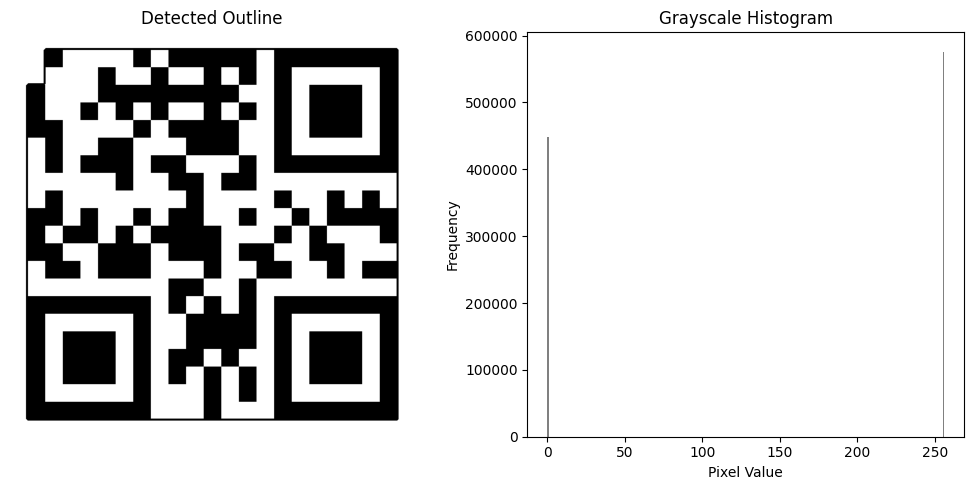

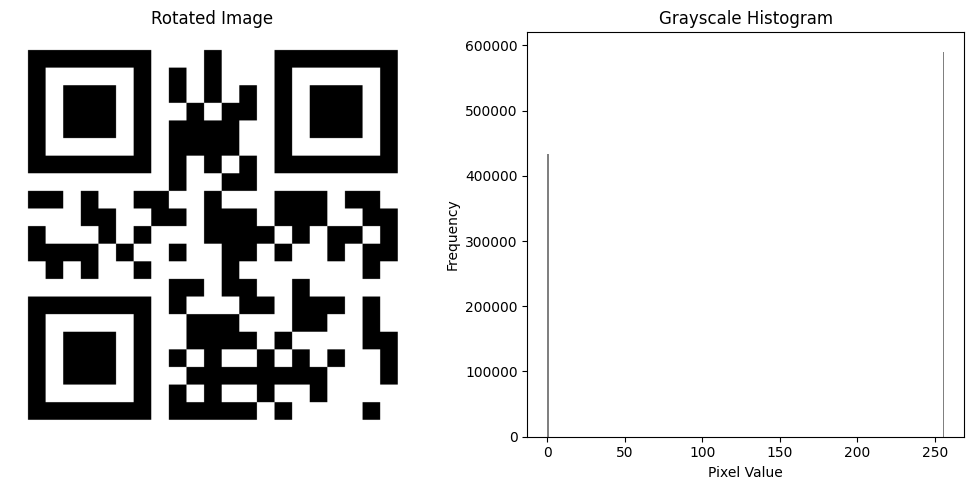

In [66]:
# Testcase 3 #
def tc03_preprocessing(original_img):
    
    # Find Hough
    hough_lines_3 = get_hough(original_img)
    # Find Contour
    exact,appx = get_contour(hough_lines_3)
    # Draw contour
    cont_img = original_img.copy()
    if exact is not None:
        cv2.drawContours(cont_img, [exact], -1, (0, 0, 0), 4) 
    # Rotate image
    rotated_img = rotate_img_clockwise(original_img, 180)
    # Construct the printing dictionary
    printing_dict = {
        'QR itself': original_img,
        'Detected Outline' : cont_img,
        'Rotated Image' : rotated_img
    }
    

    return printing_dict
    
img_3 = cv2.imread('./images/03-Leffy-bina-ya-donya.png', cv2.IMREAD_GRAYSCALE)
dict_3 = tc03_preprocessing(img_3)
plot_all_needed_images(dict_3)

### Test case 04

#### What this case needs?
* Case 04 needs mainly three things.
* First, it is inverted (black parts are white and vice versa) so we need to invert those colors.
* Second, we need to threshold the image so we can make sure that our image is binarized correctly (only intensities of 0 and 255).
* Third, we need to mirror the image so that every finder pattern is in it's correct corner.

#### What was done?
* Here we inverted the colors by subtracting 255 from the pixel instensities.
* Then we thresholded the image for the binarization aspect we mentioned above.
* Then we mirrored the image for correct finder pattern alignment.

#### What could be improved?
* Thresholding values are determined by examining the histogram of the qr code which is not the best way to do so.
* We need to both the detection of the appropriate threshold.

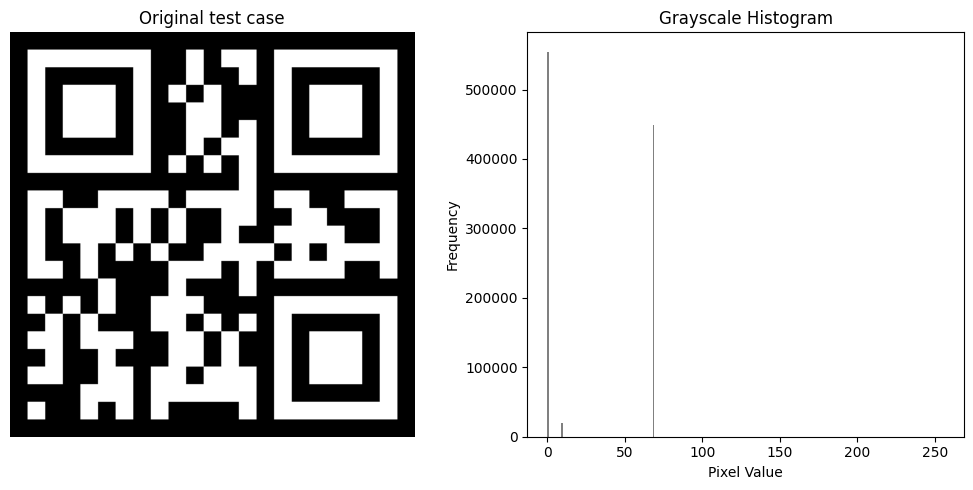

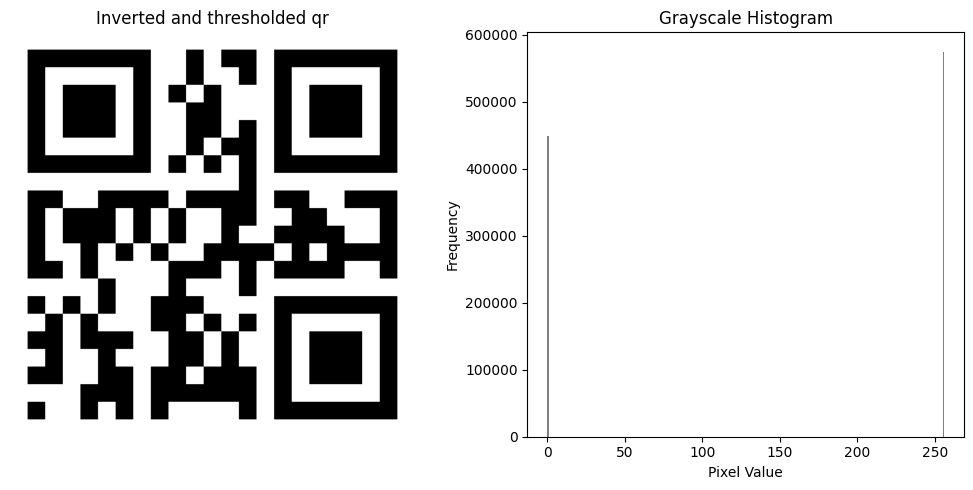

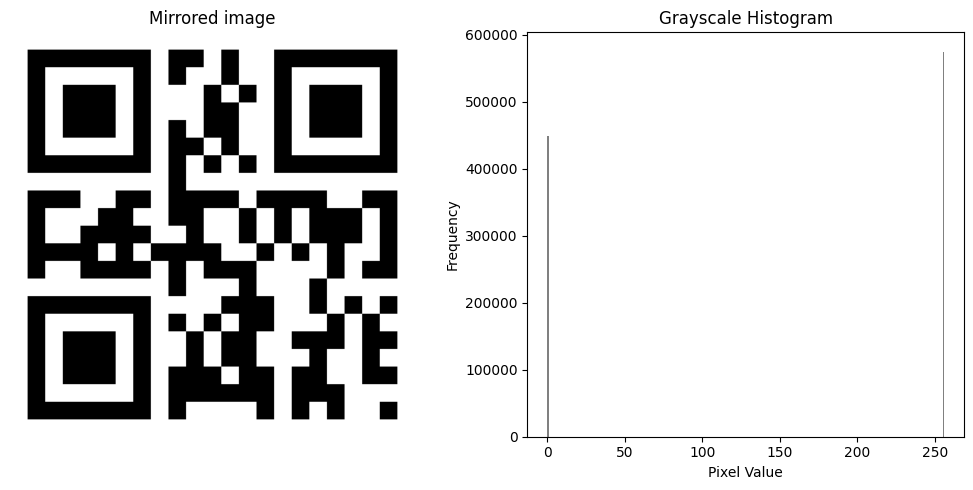

In [78]:
# Function to invert the colors of an image
def invert_and_threshold(img):
    # Invert the colors by subtracting each pixel's value from 255 (assuming it's a grayscale image)
    inverted_img = 255 - img

    _, thresholded_img = cv2.threshold(inverted_img, 200, 255, cv2.THRESH_BINARY)

    return thresholded_img

def tc04_preprocessing(img):

    inverted_thresholded_img = invert_and_threshold(img)

    # Mirror the image over the y-axis
    mirrored_image = cv2.flip(inverted_thresholded_img, 1)

    printing_dict = {
        'Original test case': img,
        'Inverted and thresholded qr': inverted_thresholded_img,
        'Mirrored image': mirrored_image,
    }

    return printing_dict

# Reading the image itself
image = cv2.imread('images/04-Black-mirror.png', cv2.IMREAD_GRAYSCALE)

printing_dict = tc04_preprocessing(image)

plot_all_needed_images(printing_dict)

### Test case 05

#### What this case needs?
* Each bundle of the image rows seems to be shifted by an amount to left or right.
* So we used the 3 finder boxes to find the refrence position that the rows should be in assunming that the distance between the image edge and the finder box should be equal.

#### What was done?
* Here we first find out the postion of the first pixel from the left and right, centered them so we get the left refrence and the right refrence.
* Iterating through rows, any row crossing the left refrence or close to the right refrence within a a certain tolerance would get shifted to the right.
* Iterating through rows, any row crossing the right refrence or close to the left refrence within a a certain tolerance would get shifted to the left.
* Any other row that doesn't apply would be centred

#### What could be improved?
* Using a solution with lower time complexity.

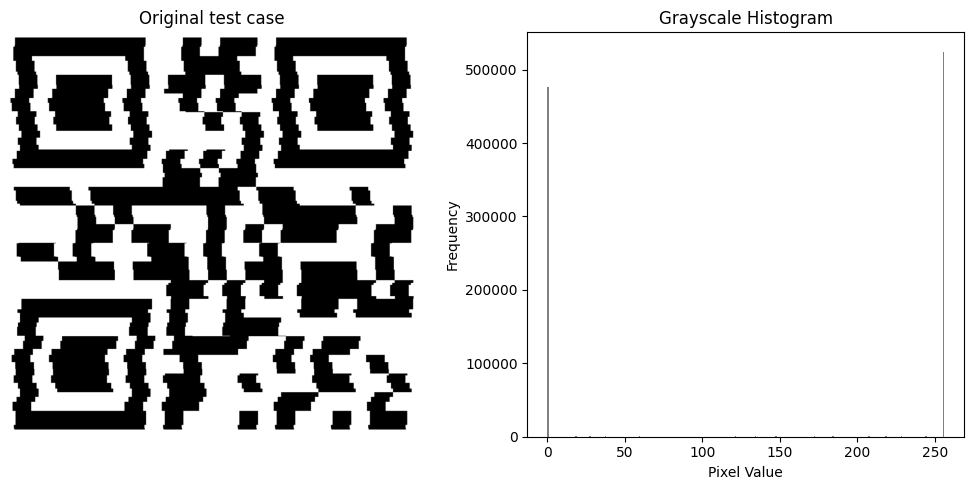

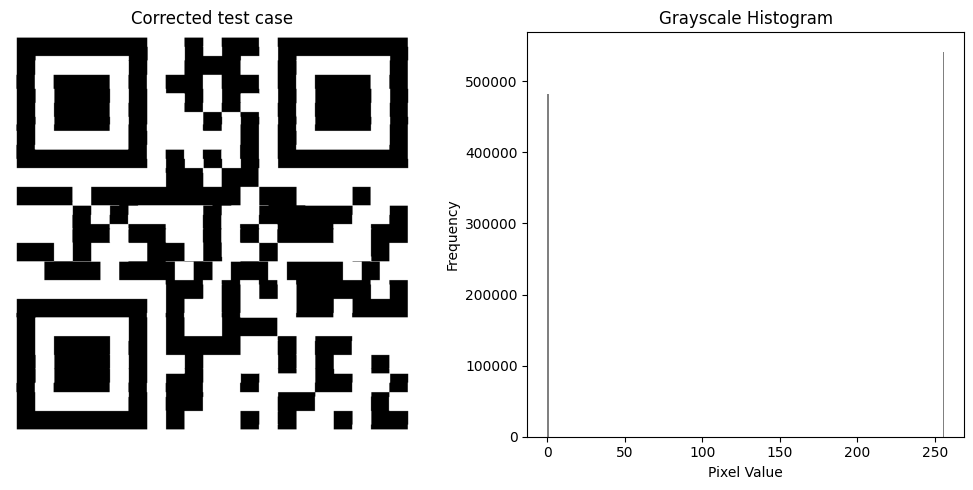

In [53]:
def tc05_preprocessing(original_img):
  #define tolerance
  t = 30

  img = original_img.copy()
  _, img = cv2.threshold(img, 90, 255, cv2.THRESH_BINARY)
  mask = np.full((img.shape[0], img.shape[1]), 255)
  h, w = img.shape[:2]

  first_from_left = 0
  first_from_right = 0
  # find first black pixel from the left
  b = False
  for i in range(h):
    if b :
      break
    for j in range(w):
      if img[i, j] == 0:
        first_from_left = j
        b = True
        break
    

  # find first black pixel from the right 
  b = False
  for i in range(h):
    if b :
      break
    for j in range(w-1, 0, -1):
      if img[i, j] == 0:
        first_from_right = j
        b = True
        break
    

  # calculate the left and right refrences
  qr_width = first_from_right-first_from_left
  left_ref = int((w-qr_width)/2)
  right_ref = left_ref+qr_width

  #print(f"sss: {first_from_left} {first_from_right}")

  # apply correction to each row
  for i in range(h):

    found_black_pixel = False

    # find left and right boundaries
    l_ptr = 0
    r_ptr = w-1

    while (img[i, l_ptr] == 255 or img[i, r_ptr] == 255) and (l_ptr < r_ptr):
      if img[i, l_ptr] == 255:
        l_ptr += 1
      else:
        found_black_pixel = True

      if img[i, r_ptr] == 255:
        r_ptr -= 1
      else:
        found_black_pixel = True

    #print(l_ptr)


    # correct if cross left refrence

    if (l_ptr<left_ref ) and found_black_pixel:
      shift_amount = left_ref - l_ptr
      # Shift row to the right -->
      mask[i][l_ptr+shift_amount:r_ptr+shift_amount] = img[i][l_ptr:r_ptr]

    elif (right_ref-r_ptr < t) and found_black_pixel:
      shift_amount = right_ref-r_ptr
      # Shift row to the right -->
      mask[i][l_ptr+shift_amount:r_ptr+shift_amount] = img[i][l_ptr:r_ptr]

    elif (r_ptr>right_ref ) and found_black_pixel:
      shift_amount = r_ptr - right_ref
      # Shift row to the left <--
      mask[i][l_ptr-shift_amount:r_ptr-shift_amount] = img[i][l_ptr:r_ptr]

    elif (l_ptr-left_ref < t ) and found_black_pixel:
      shift_amount = l_ptr-left_ref
      # Shift row to the left <--
      mask[i][l_ptr-shift_amount:r_ptr-shift_amount] = img[i][l_ptr:r_ptr]
    
    else:
      # Center the row
      center_of_the_row = int((r_ptr + l_ptr)/2)
      center_refrence = int((right_ref + left_ref)/2) 
      shift_amount = center_of_the_row - center_refrence
      mask[i][l_ptr-shift_amount:r_ptr-shift_amount] = img[i][l_ptr:r_ptr]

  printing_dict = {
    'Original test case': original_img,
    'Corrected test case': mask,
  }
  return printing_dict
 
 # load a grayscale image


original_img = cv2.imread('images/05-Caesar-cipher.png', cv2.IMREAD_GRAYSCALE)

printing_dict = tc05_preprocessing(original_img)

plot_all_needed_images(printing_dict)


### Test case 06

#### What this case needs?
* Case 06 is shifted as if we're seeing it from a different angle.
* First, we need to correctly determine it's outline.
* Second, we need to get its correct contour.
* Third, we need to stretch it back in a sense. Meaning, we need to shift the perspective back to the normal perspective we're used to.

#### What was done?
* Here we got the outline of the qr code by using both hough lines and contours.
* Then we calculated the shift in perspective we need to apply and applied it using the 'shift_perspective' function in the general functions section above.
* 'shift_perspective' is based on a function from opencv but we tweaked it so we can correctly use it for our test case.

#### What could be improved?
* The 'shift_perspective' function can be more generic so that it can detect the target verticies automatically.

[[974  92]
 [ 60  93]
 [ 60 952]
 [974 951]]


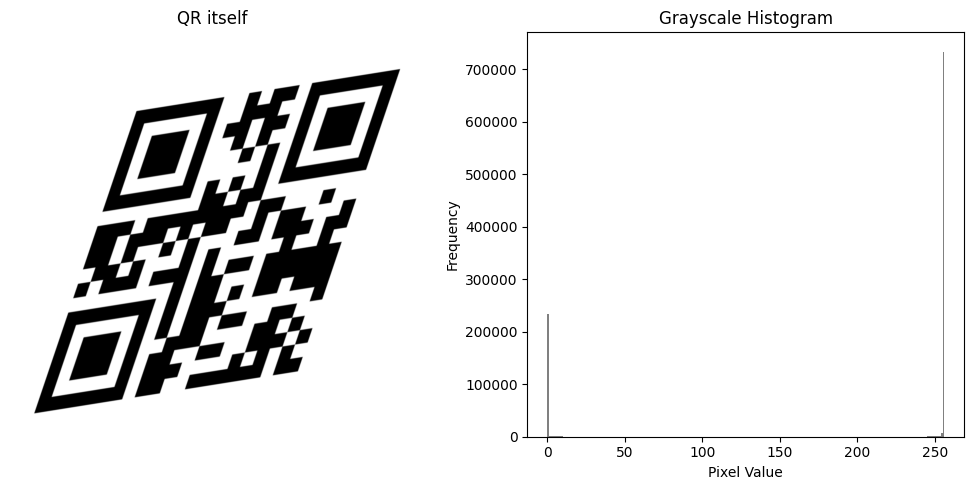

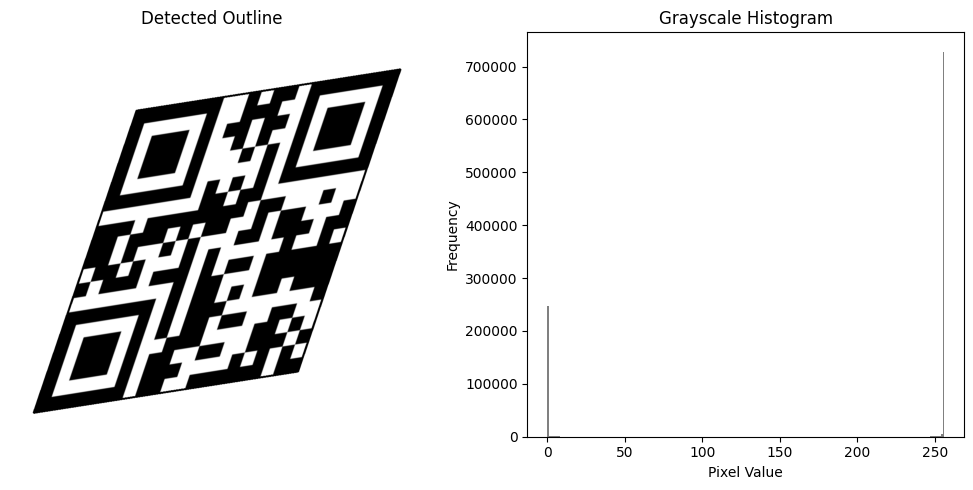

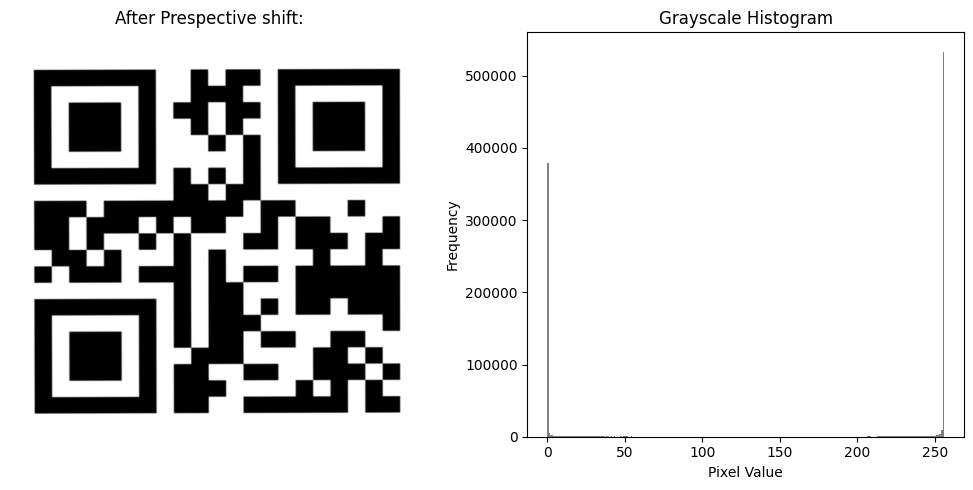

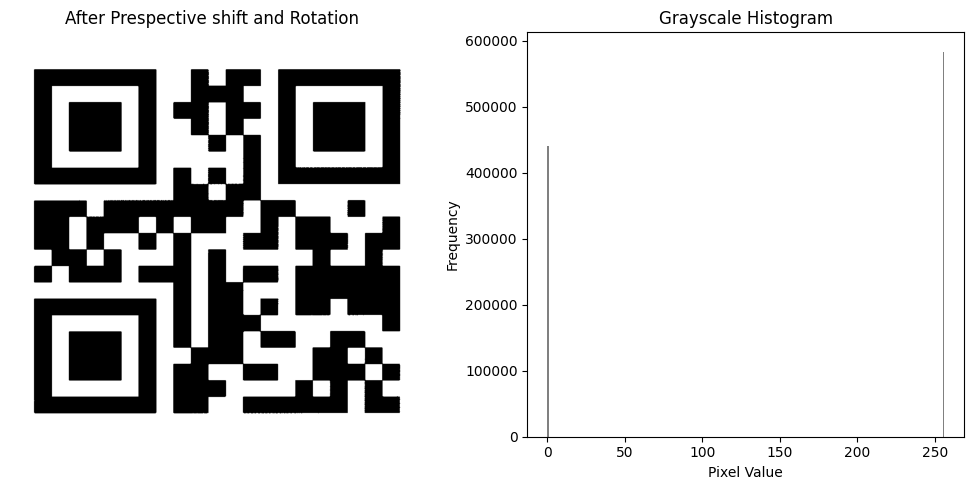

In [151]:
# Testcase 6 #
def find_points_with_xMin(cont):
    min_x = 9999
    min_points = []
    for point in cont:
        if point[1] <= min_x:
            min_x = point[1]
            min_points.append(point)
    return min_points

def find_points_with_xMax (cont):

    max_x = 0
    max_points = []
    for point in cont:
        if point[1] >= max_x:
            max_x = point[1]
            max_points.append(point)
    return max_points

def find_points_with_yMax (cont):

    max_y = 0
    max_points = []
    for point in cont:
        if point[0] >= max_y:
            max_y = point[0]
            max_points.append(point)
    return max_points

def find_point_with_XMminYMax (cont):
    # Finding the top right point #
    min_points = find_points_with_xMin(cont)
    return find_points_with_yMax(min_points)[-1]

def find_point_with_YMaxXMax (cont):
    # Finding the top right point #
    max_points = find_points_with_yMax(cont)
    return find_points_with_xMax(max_points)[-1]

def rotation_correction(img):

    # Find Hough
    hough_lines = get_hough(img)
    # Find Contour
    exact,appx = get_contour(hough_lines)
    # # Draw contour
    # cont_img = img.copy()
    # if exact is not None:
    #     cv2.drawContours(cont_img, [exact], -1, (0, 0, 0), 4)
    # Find angle between contour side and y-axis 
    p1 = find_point_with_XMminYMax(exact.reshape(-1, 2))
    p2 = find_point_with_YMaxXMax(exact.reshape(-1, 2))
    vector = p2-p1
    angle = find_angle(vector) # 8.38 degrees
    # Rotate the image
    rotated_img = rotate_img_clockwise(img, angle)
    return rotated_img

def shift_perspective_mod(img, contour, target_verticies):

    w,h = img.shape[:2]

    #   Original verticies from the contour
    bottom_left, top_left, top_right, bottom_right = contour.reshape(-1, 2)
    original_verticies = np.array([bottom_left, top_left, top_right, bottom_right], dtype= np.float32)

    # Apply prespective transfrom
    perspective_transform_matrix = cv2.getPerspectiveTransform(original_verticies, target_verticies)
    return (cv2.warpPerspective(img, perspective_transform_matrix, (w, h), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255)))

def tc06_preprocessing(original_img):

    # Find Hough
    hough_lines_6 = get_hough(original_img)
    # Find the approximate Contour
    exact,appx = get_contour(hough_lines_6)
    
    # Draw approximate Contour
    cont_img = original_img.copy()
    if appx is not None:
        cv2.drawContours(cont_img, [appx], -1, (0, 0, 0), 4) 
    # Fitting the QR code into a square #



    # Find contour edge vertices
    top_right, top_left, bottom_left, bottom_right = appx.reshape(-1, 2)
    # Calculate new edge vertices positions
    top_left = [bottom_left[0], top_right[1]]
    bottom_right = [top_right[0], bottom_left[1]]
    target_verticies = np.array([top_right, top_left, bottom_left, bottom_right], dtype= np.float32)
    warped_image = shift_perspective_mod(original_img, appx, target_verticies)

    # Rotate correction
    # Find Hough
    hough_lines_correction = get_hough(warped_image)
    # Find Contour
    exact_correction,appx_correction = get_contour(hough_lines_correction)
    # print(appx_correction)
    cont_img_correction = warped_image.copy()
    if exact_correction is not None:
        cv2.drawContours(cont_img_correction, [exact_correction], -1, (0, 0, 0), 4)

    
    print(appx_correction.reshape(-1, 2))
    # Draw the point on the image
    # cv2.circle(warped_image, appx_correction.reshape(-1, 2)[2], 10, (0,0,0), -1)

    # Find angle between contour side and y-axis 
    p1 = find_point_with_xMminYMax(exact_correction.reshape(-1, 2))
    p2 = find_point_with_yMax(exact_correction.reshape(-1, 2))
    vector = p2-p1
    angle = find_angle(vector) 
    # Rotate the image
    rotated_img = rotate_img_clockwise(warped_image, angle)
    ret, thresh = cv2.threshold(rotated_img, 170, 255, cv2.THRESH_BINARY)
    # Construct the printing dictionary
    printing_dict = {
        'QR itself': original_img,
        'Detected Outline' : cont_img,
        'After Prespective shift: ' : warped_image,
        'After Prespective shift and Rotation' : thresh
    }
    # cv2.imwrite(os.path.join('./images', '06-solved-2.png'), thresh)
    return printing_dict

img_6 = cv2.imread('./images/06-Railfence-cipher.png', cv2.IMREAD_GRAYSCALE)
dict_6 = tc06_preprocessing(img_6)
plot_all_needed_images(dict_6)

### Test case 07

#### What this case needs?
* Case 07 with the finger blocking part of the qr caused us two main problems.
* First, we need to remove the finger using thresholding so that it doesn't affect the relevant data needed for decoding.
* Second, we need to fill in the place of the missing finder pattern so we can correctly decode the qr code.

#### What was done?
* Here we removed the finger by using thresholding techniques as mentioned in the above test cases.
* Then we applied fourier transform as a kind of exploratory analysis.
* Then we filled in the missing finder pattern; deducing the coordinates using the two other finder patterns.

#### What could be improved?
* The filling in part for the finder pattern is not automated so we had to manually deduce the coordinates of the finder pattern and then fill it.
* A better approach would be to auotmatically deduce the finder pattern coordinates using hough lines and contours.

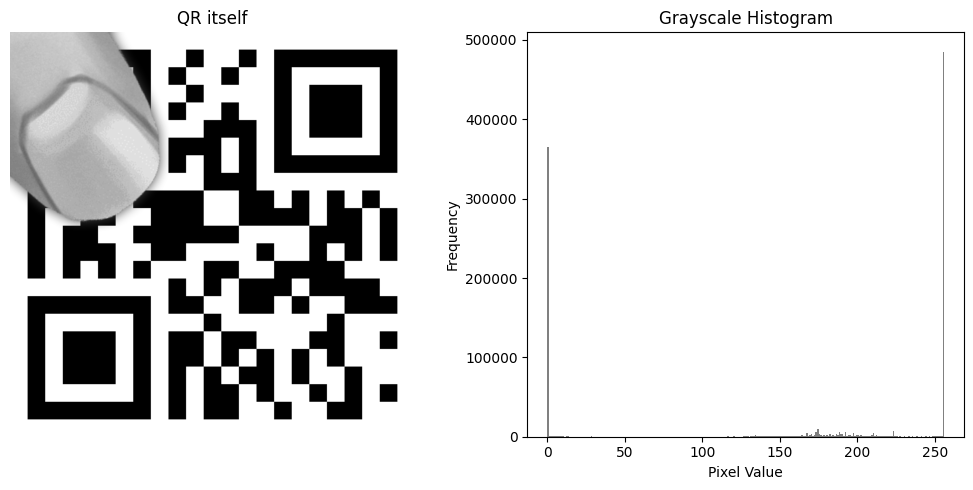

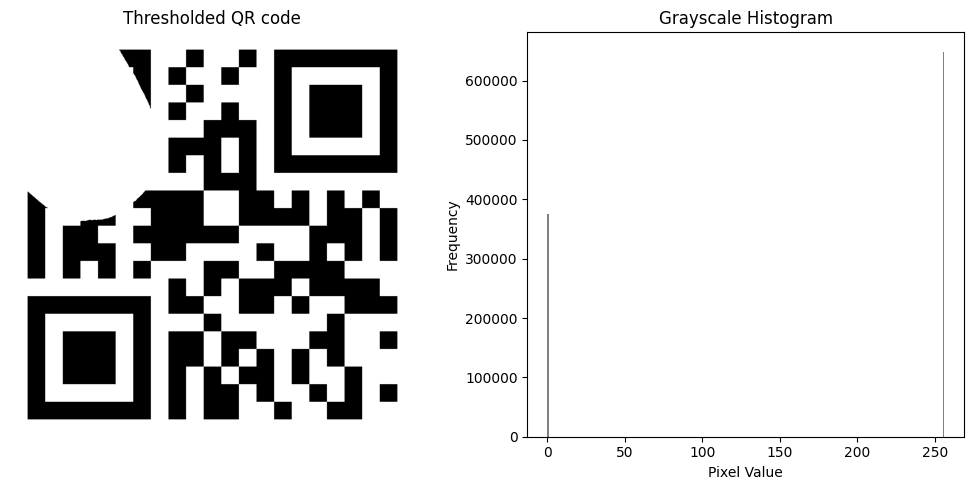

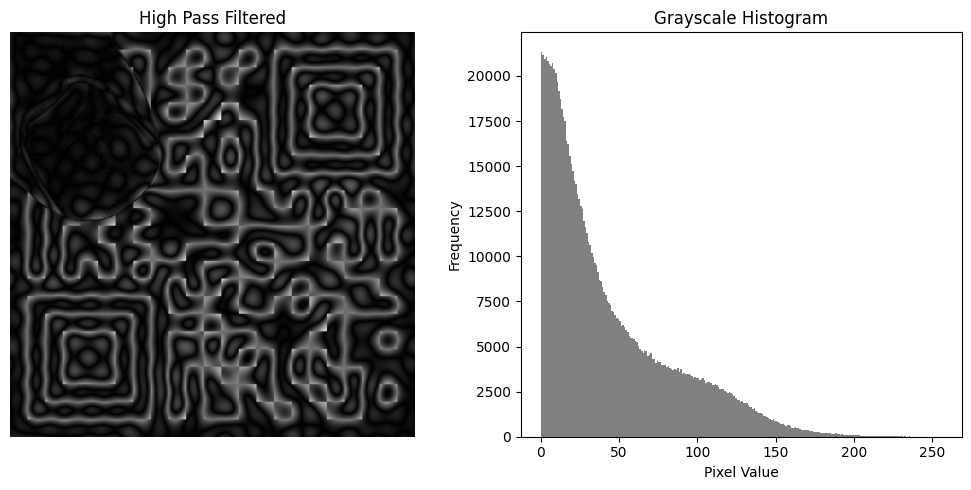

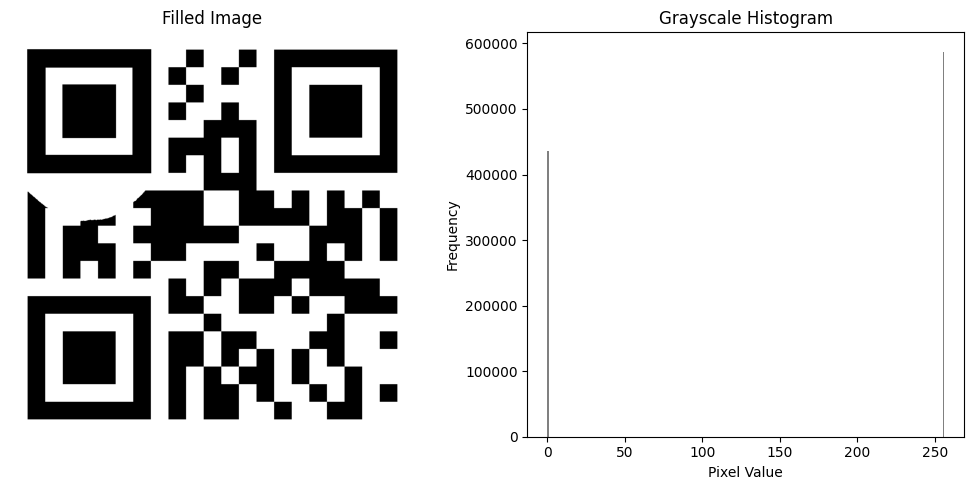

In [56]:
def fill_gaps_07(img):
    img_copy = img.copy()
    #! filling in the TOP LEFT FINDER PATTERN
    # filling the MIDDLE SQUARE
    pts = np.array([[131,264], [131, 131], [264, 131], [264, 264]], dtype=np.int32)
    pts = pts.reshape((-1, 1, 2))
    cv2.fillPoly(img_copy, [pts], (0, 0, 0))

    # filling the LEFT OUTER LEG
    pts = np.array([[43,352], [43, 43], [88, 43], [88, 352]], dtype=np.int32)
    pts = pts.reshape((-1, 1, 2))
    cv2.fillPoly(img_copy, [pts], (0, 0, 0))

    # filling the UPPER OUTER LEG
    pts = np.array([[43,88], [43, 43], [352, 43], [352, 88]], dtype=np.int32)
    pts = pts.reshape((-1, 1, 2))
    cv2.fillPoly(img_copy, [pts], (0, 0, 0))

    # filling the RIGHT OUTER LEG
    pts = np.array([[306,352], [306, 43], [352, 43], [352, 352]], dtype=np.int32)
    pts = pts.reshape((-1, 1, 2))
    cv2.fillPoly(img_copy, [pts], (0, 0, 0))

    # filling the BOTTOM OUTER LEG
    pts = np.array([[43,352], [43, 307], [352, 307], [352, 352]], dtype=np.int32)
    pts = pts.reshape((-1, 1, 2))
    cv2.fillPoly(img_copy, [pts], (0, 0, 0))

    return img_copy

def tc07_preprocessing(image):

    # Calculate the histogram
    hist = cv2.calcHist([image], [0], None, [256], [0,256])

    _, thresh_img = cv2.threshold(image, 90, 255, cv2.THRESH_BINARY)

    # Calculate the Fourier transform
    f_transform = np.fft.fft2(image)
    f_transform_shifted = np.fft.fftshift(f_transform)
    magnitude_spectrum = 20*np.log(np.abs(f_transform_shifted)+500)

    # Apply high-pass filter
    rows, cols = image.shape
    crow, ccol = rows//2, cols//2
    mask = np.ones((rows, cols), np.uint8)
    r = 15  # Radius of the circular mask
    center = [crow, ccol]
    x, y = np.ogrid[:rows, :cols]
    mask_area = (x - center[0])**2 + (y - center[1])**2 <= r*r
    mask[mask_area] = 0
    f_transform_shifted_filtered = f_transform_shifted * mask

    # Calculate the inverse Fourier transform
    f_transform_filtered = np.fft.ifftshift(f_transform_shifted_filtered)
    image_filtered = np.fft.ifft2(f_transform_filtered)
    image_filtered = np.abs(image_filtered)

    # Fill in the finder pattern for decoding
    image_filled = fill_gaps_07(thresh_img)

    printing_dict = {
        'QR itself': image,
        'Thresholded QR code': thresh_img,
        'High Pass Filtered': image_filtered,
        'Filled Image': image_filled
    }

    return printing_dict

# Load the image
image = cv2.imread('images/07-THE-MIGHTY-FINGER.png', cv2.IMREAD_GRAYSCALE)

printing_dict = tc07_preprocessing(image)

plot_all_needed_images(printing_dict)


### Test case 08

#### What this case needs?
* Case 08 needs mainly closing since we have big parts of the qr code that are forming shapes but they're lacking some spaces (holes) in those shapes.

#### What was done?
* Here we first determined the kind of structuring element we need to be a kernel of dimensions (21x21).
* Then we performed the closing operation we mentioned we needed.

#### What could be improved?
* The deduction of the structuring element is not completely automated.

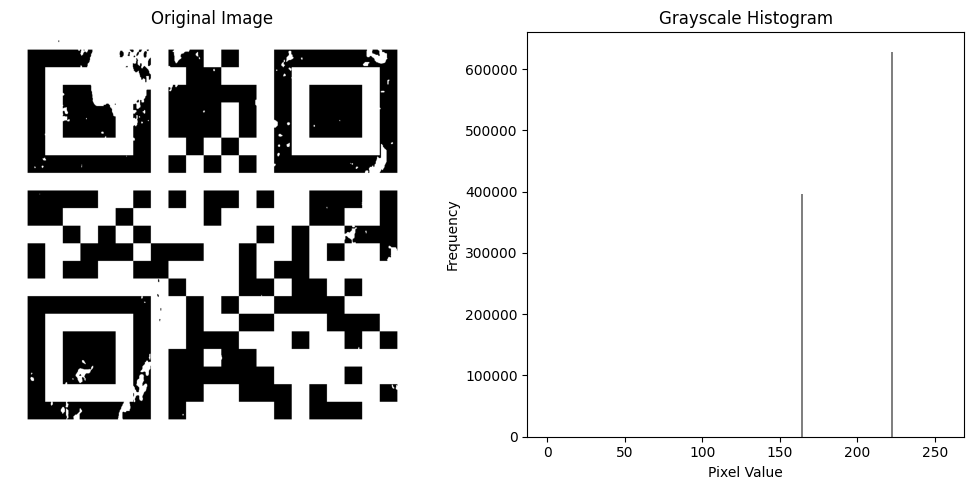

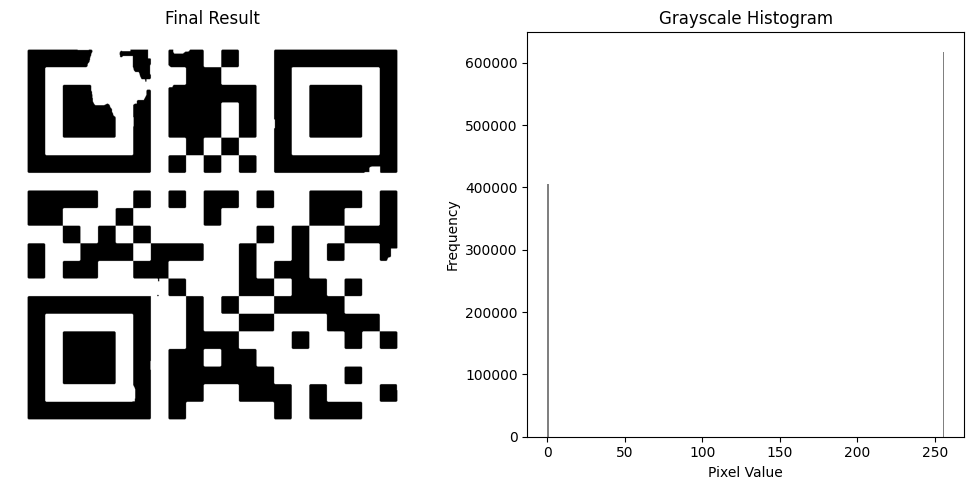

In [116]:
def tc08_preprocessing(img):
    # Find the unique pixel values
    unique_values = np.unique(img)
    m = np.median(unique_values)
    #print(unique_values) # 164, 222

    # Apply thresholding
    ret, thresh = cv2.threshold(img, m, 255, cv2.THRESH_BINARY)

    # Apply median filtering
    filtered_image = cv2.medianBlur(thresh, 5)
    
    # Define the kernel for morphological operation
    kernel = np.ones((21, 21),np.uint8)

    # Apply morphological closing , !!!!!!!!!!!!!!apply openning
    closing = cv2.morphologyEx(filtered_image, cv2.MORPH_OPEN, kernel)

    

    printing_dict = {
        'Original Image': img,
        'Final Result': closing,
    }    
    cv2.imwrite(os.path.join('./images', '08-solved.png'), closing)
    return printing_dict


image = cv2.imread('images/08-Compresso-Espresso.png', cv2.IMREAD_GRAYSCALE)

printing_dict = tc08_preprocessing(image)

plot_all_needed_images(printing_dict)


### Test case 09

#### What this case needs?
* By analyzing Case 09, it seems to be blurred using a diagonal averaging filter which caused it to merge along the diagonal.
* First, morphological opening will need to be implemented to open the connections between diagonals .
* Second, we need to apply Weiner deconvolution to remove the effect of the averaging filter.
* Third, we need to close the output from Weiner operation to get a more coherent output.

#### What was done?
* Here we applied opening to the image to remove connections in the diagonals.
* Then we applied the Weiner deconvolution to remove the effect of the averaging filter.
* Then we blurred the image and applied morphological closing to fill any unwanted gaps in the output.

#### What could be improved?
* Applying an algorithm to better estimate the point-spread-function that was applied to the image in the first place to get a better output from the Weiner operation.

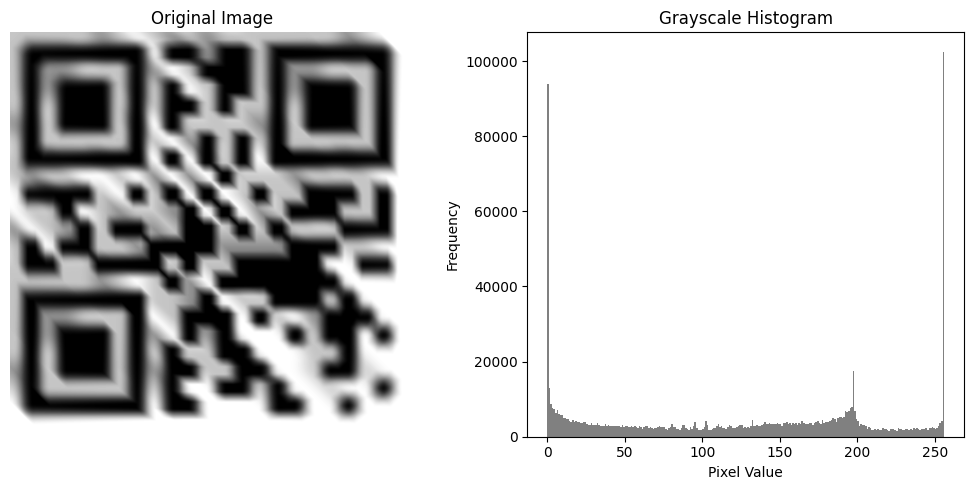

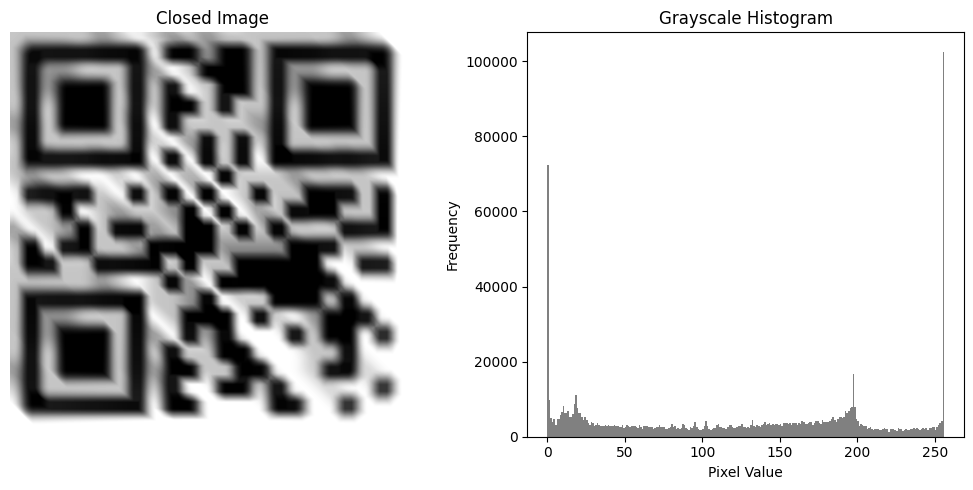

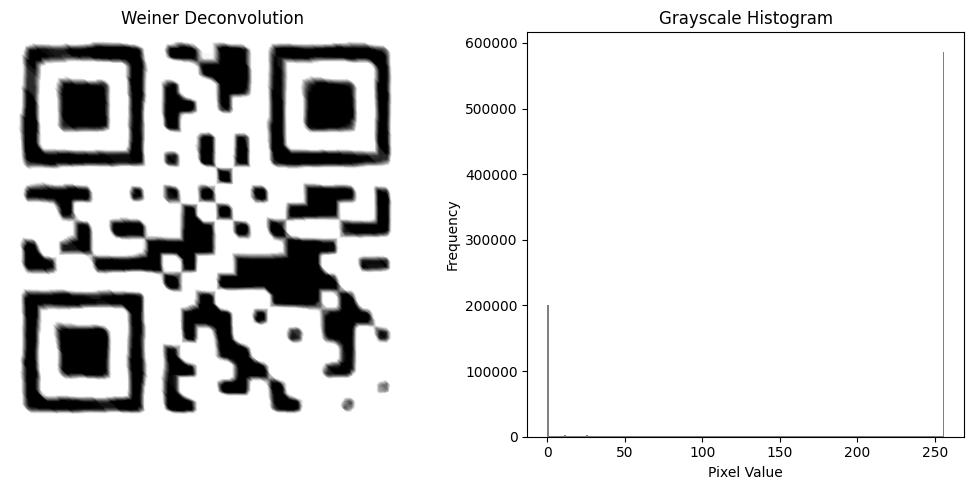

In [56]:
def tc09_preprocessing(img):
    # Calculate the histogram
    # hist = cv2.calcHist([img], [0], None, [256], [0,256])

    # Apply morphological opening (will be closing in this case) 

    # Create a kernel
    kernel = np.ones((17, 17), np.uint8)

    # Apply morphological opening
    processed_img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

    #plt.imshow(processed_img, cmap='gray')

    # Apply Weiner deconvultion

    # Intialize the kernel 
    kernel_size = 3
    kernel = np.zeros((kernel_size, kernel_size))
    for i in range(kernel_size):
        kernel[i, i] = 1/(kernel_size**2)
    # kernel /= np.sum(kernel)

    # Pad the kernel to match the size of the blurred image
    padded_kernel = np.zeros_like(processed_img, dtype=np.float64)
    kernel_height, kernel_width = kernel.shape
    padded_kernel[:kernel_height, :kernel_width] = kernel

    # FT of the kernel
    ft_kernel = np.fft.fft2(padded_kernel)

    # FT of the image
    ft_image = np.fft.fft2(processed_img)

    # Apply Wiener deconvolution
    epsilon = 1e-8  # Small constant to avoid division by zero
    wiener_filter = np.conj(ft_kernel) / (np.abs(ft_kernel)**2 + epsilon)
    restored_image_fft = ft_image * wiener_filter
    restored_image = np.fft.ifft2(restored_image_fft).real

    # Clip the values to [0, 255] and convert to uint8
    restored_image = np.clip(restored_image, 0, 255).astype(np.uint8)

    # # Apply thresholding
    # ret, thresholded_spectrum = cv2.threshold(restored_image, 250, 255, cv2.THRESH_BINARY)

    # Apply median blurring
    blurred_image = cv2.medianBlur(restored_image, 5)

    kernel = np.ones((21,21),np.uint8)
    closing = cv2.morphologyEx(blurred_image, cv2.MORPH_OPEN, kernel)

    printing_dict = {
        'Original Image': img,
        'Closed Image': processed_img,
        'Weiner Deconvolution': closing
    }
    cv2.imwrite(os.path.join('./images', '09-solved.png'), closing)
    return printing_dict

img = cv2.imread('images/09-My-phone-fell-while-taking-this-one-...-or-did-it.png', cv2.IMREAD_GRAYSCALE)

printing_dict = tc09_preprocessing(img)

plot_all_needed_images(printing_dict)

### Test case 10

#### What this case needs?
* Case 10 needs 4 main things.
* First, we need to stretch it's contrasts since the original image is barely visible.
* Second, we need thresholding to binarize our image into 2 pixel intensities only (0 and 255).
* Third, we need closing to close the gaps that are already present in the qr as much as we can.
* Fourth, we need to fill in the finder patterns so the qr code can be correctly decoded.

#### What was done?
* Here we applied contrast stretching so we can start to see the image details.
* Then we applied thresholding to binarize our image (0 and 255).
* After that, we applied the morphological operation (closing) to the qr code to fill in the holes in the shapes.
* Lastly, we filled in the finder pattern so we can correctly decode our qr code.

#### What could be improved?
* Here we have automated the contrast stretching part so that's a plus.
* But the same problems apply for the thresholding and finder pattern filling persist.

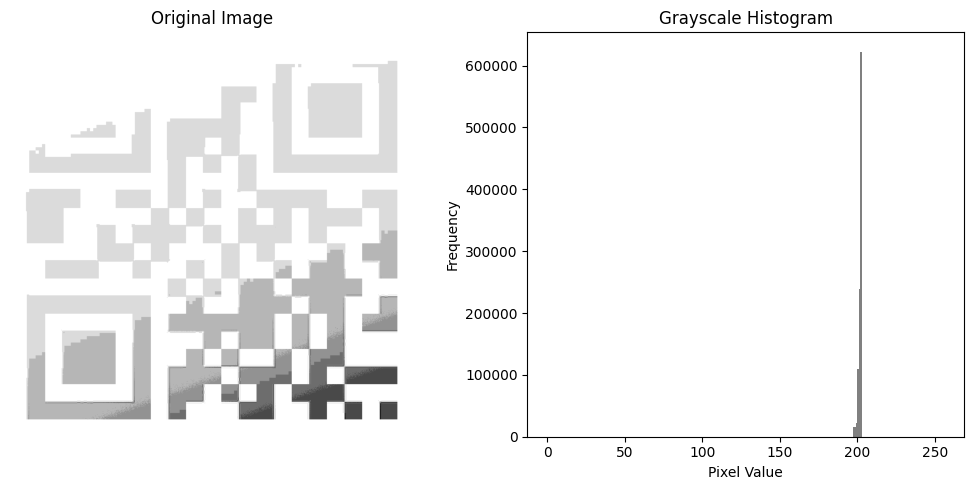

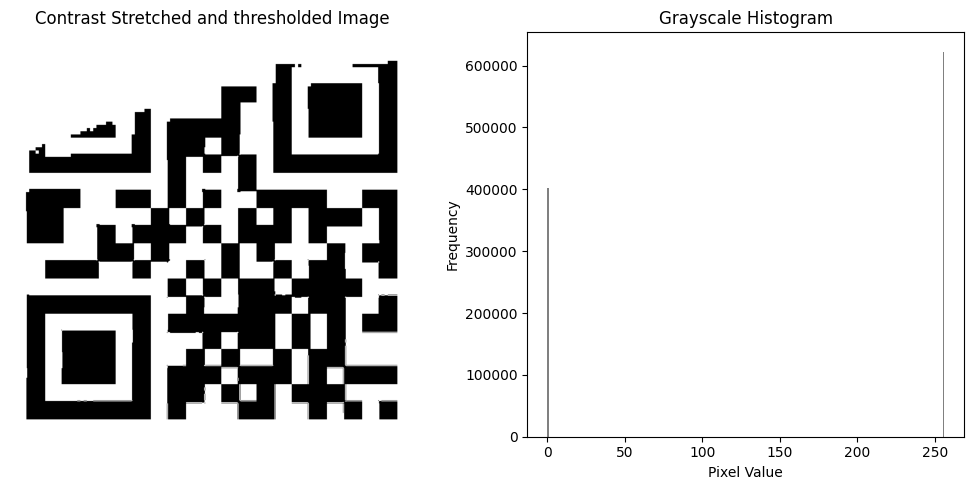

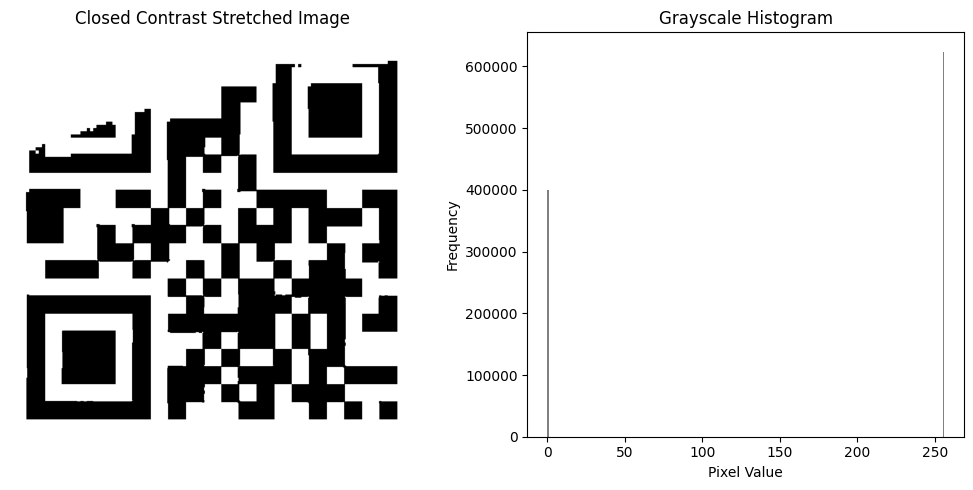

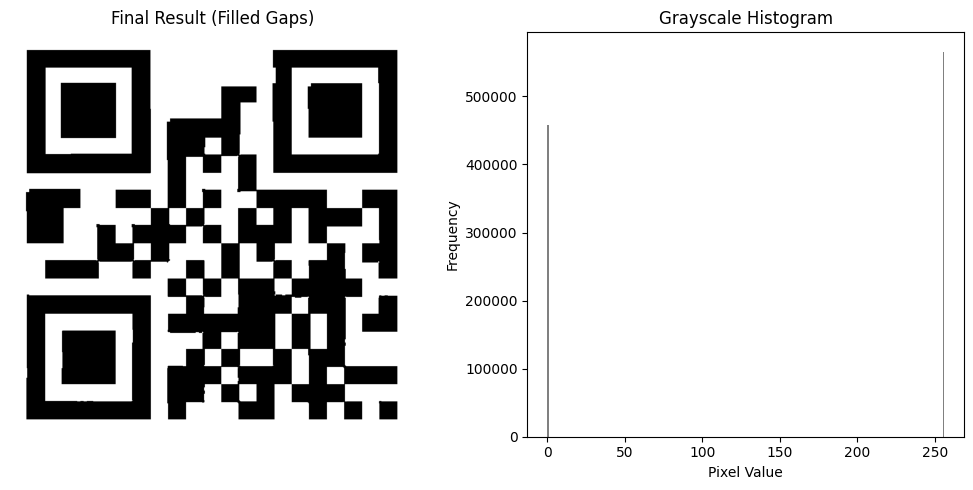

In [57]:
def contrast_stretching_and_thresholding(image):

    # Compute the minimum and maximum pixel values
    min_val = np.min(image)
    max_val = np.max(image)

    # Apply contrast stretching formula to each pixel
    stretched_image = ((image - min_val) / (max_val - min_val)) * 255.0

    # Apply binary thresholding to make pixels either 0 or 255
    _, thresholded_img = cv2.threshold(stretched_image, 254, 255, cv2.THRESH_BINARY)

    return thresholded_img

def apply_closing(image, kernel_size):
    # Define the kernel for dilation and erosion
    kernel = np.ones((kernel_size, kernel_size), np.uint8)

    # Apply dilation
    dilated_image = cv2.dilate(image, kernel, iterations=1)

    # Apply erosion
    closed_image = cv2.erode(dilated_image, kernel, iterations=1)

    return closed_image

def fill_gaps_10(img):
    image_copy = img.copy()
    #! filling in the TOP LEFT FINDER PATTERN
    # filling the MIDDLE SQUARE
    pts = np.array([[127,127], [127, 264], [264, 264], [264, 127]], dtype=np.int32)
    pts = pts.reshape((-1, 1, 2))
    cv2.fillPoly(image_copy, [pts], (0, 0, 0))

    # filling the LEFT OUTER LEG
    pts = np.array([[42,352], [42, 45], [88, 45], [88, 352]], dtype=np.int32)
    pts = pts.reshape((-1, 1, 2))
    cv2.fillPoly(image_copy, [pts], (0, 0, 0))

    # filling the UPPER OUTER LEG
    pts = np.array([[42,88], [42, 45], [350, 45], [350, 88]], dtype=np.int32)
    pts = pts.reshape((-1, 1, 2))
    cv2.fillPoly(image_copy, [pts], (0, 0, 0))

    # filling the RIGHT OUTER LEG
    pts = np.array([[304,352], [304, 45], [350, 45], [350, 352]], dtype=np.int32)
    pts = pts.reshape((-1, 1, 2))
    cv2.fillPoly(image_copy, [pts], (0, 0, 0))

    # filling the BOTTOM OUTER LEG
    pts = np.array([[42,352], [42, 305], [350, 305], [350, 352]], dtype=np.int32)
    pts = pts.reshape((-1, 1, 2))
    cv2.fillPoly(image_copy, [pts], (0, 0, 0))

    #! filling in the TOP RIGHT FINDER PATTERN
    # filling the UPPER OUTER LEG
    pts = np.array([[657,88], [657, 45], [967, 45], [967, 88]], dtype=np.int32)
    pts = pts.reshape((-1, 1, 2))
    cv2.fillPoly(image_copy, [pts], (0, 0, 0))

    return image_copy

def tc10_preprocessing(img):
    # applying contrast stretching
    stretched_img = contrast_stretching_and_thresholding(img)
    closed_stretched_img = apply_closing(stretched_img, kernel_size=3)
    finalResult = fill_gaps_10(closed_stretched_img)

    printing_dict = {
        "Original Image": img,
        "Contrast Stretched and thresholded Image": stretched_img,
        "Closed Contrast Stretched Image": closed_stretched_img,
        "Final Result (Filled Gaps)": finalResult
    }

    return printing_dict


gone_with_the_wind_image_path = 'images/10-Gone-With-The-Wind.png'

# Read the image
img = cv2.imread(gone_with_the_wind_image_path, cv2.IMREAD_GRAYSCALE)

printing_dict = tc10_preprocessing(img)

plot_all_needed_images(printing_dict)

### Test case 11

#### What this case needs?
* Case 11 needs only one thing.
* It is apparent that there is a sinusoidal noise (vertical bandding) applied to it, which has to be removed in the frequency domain.

#### What was done?
* Here we analyzed the noise, which was vertical bars meaning it would translate to a frequency in the horizontal axis, then by analyzing the frequency-amplitude graph , we removed the sine wave at frequency 11 and -11.

#### What could be improved?
* Removing the noise in the frequency domain using a combination of a low-pass and high-pass filter to isolate the targeted frequency.

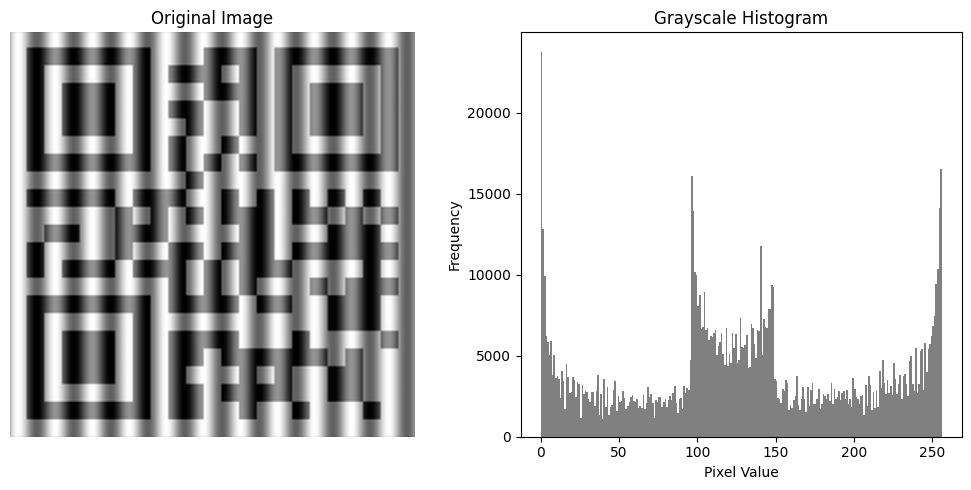

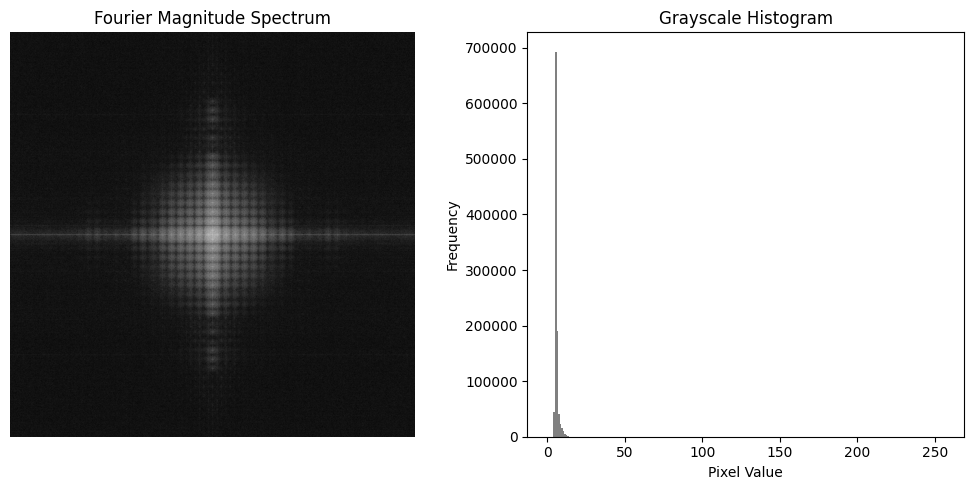

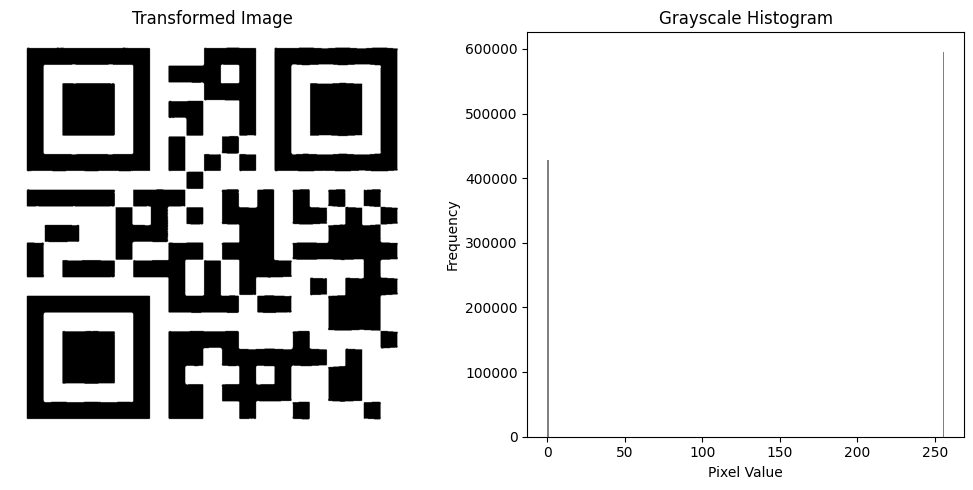

In [61]:
def tc11_preprocessing(img):
    # Compute fourier tranform of the image 
    f_transform = np.fft.fft2(img)
    f_transform_shifted = np.fft.fftshift(f_transform)

    # View transform and zoom on the middle
    magnitude_spectrum =  np.log(np.abs(f_transform_shifted) + 100)
    # plt.imshow(magnitude_spectrum, cmap='gray')

    # Create a filter to remove sinusoidal noise of frequency 11
    mask = np.ones_like(img)
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    mask[crow][ccol-11] = 0
    mask[crow][ccol+11] = 0
    # mask[crow][ccol-12] = 0
    # mask[crow][ccol+12] = 0


    # Apply the filter mask
    f_transform_shifted_filtered = f_transform_shifted * mask

    # # View transform and zoom on the middle
    # magnitude_spectrum_filtered =  np.log(np.abs(f_transform_shifted_filtered) + 100)
    # plt.imshow(magnitude_spectrum_filtered, cmap='gray')

    # Do inverse fourier transform
    fft_ifft_shift = np.fft.ifftshift(f_transform_shifted_filtered)
    imageThen = np.fft.ifft2(fft_ifft_shift)
    imageThen = np.abs(imageThen)
    #plt.imshow(imageThen, cmap='gray')

    # Apply thresholding
    ret, thresholded_spectrum = cv2.threshold(imageThen, 100, 255, cv2.THRESH_BINARY)

    printing_dict = {
    'Original Image': img,
    'Fourier Magnitude Spectrum': magnitude_spectrum,
    'Transformed Image': thresholded_spectrum
    }

    return printing_dict

image = cv2.imread('./images/11-weewooweewooweewoo.png', cv2.IMREAD_GRAYSCALE)

printing_dict = tc11_preprocessing(image)

plot_all_needed_images(printing_dict)

### Test case 12

#### What this case needs?
* Case 12 needs to get rid of the salt and pepper noise plaguing it.
* The salt and pepper noise are pixels with random extreme values that appear in the wrong place.
* We need to apply a median filter to remove these pixels by ordering the pixels within it's kernel thus removing the pixel with the outlier value from its current place and replacing it with the median.

#### What was done?
* Here we applied thresholding to binarize our image before applying the median filter.
* Then we applied the median filter on our image with a kernel size of (31x31).

#### What could be improved?
* The kernel size for the median filter is not completely automated so a better approach would be to automate it so we can use this function on any kind of grayscale image with salt and pepper noise.

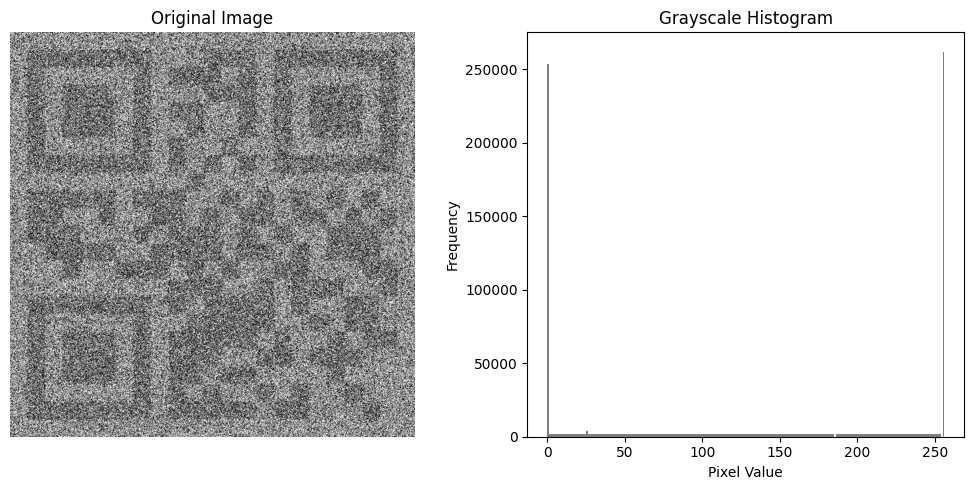

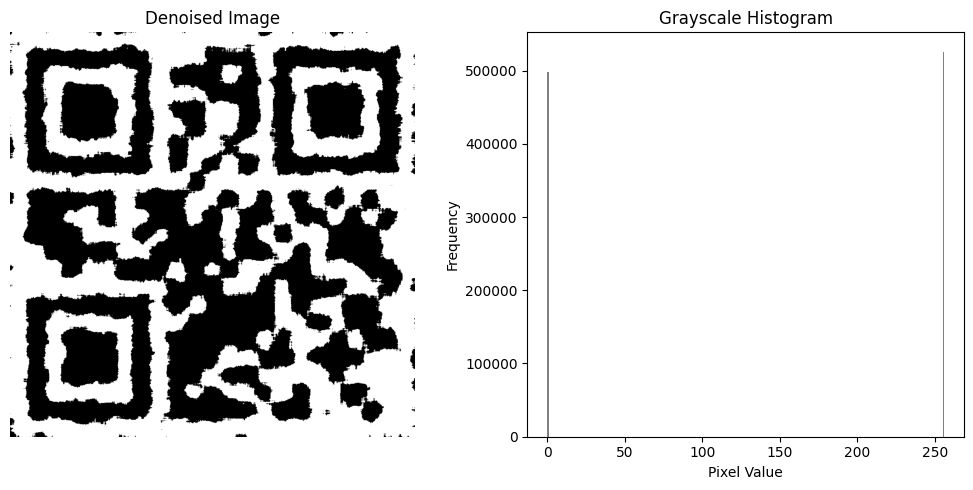

In [61]:
def remove_salt_and_pepper_noise(img):
    # Apply binary thresholding to make pixels either 0 or 255
    _, thresholded_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

    # Apply custom median filtering
    filtered_image = cv2.medianBlur(thresholded_img, ksize=31)  # Apply median filter with ksize=1 (kernel size not used)

    return filtered_image

def tc12_preprocessing(img):
    denoised_image = remove_salt_and_pepper_noise(img)

    printing_dict = {
        'Original Image': img,
        'Denoised Image': denoised_image
    }

    return printing_dict


img = cv2.imread('images/12-mal7-w-felfel.png', cv2.IMREAD_GRAYSCALE)

printing_dict = tc12_preprocessing(img)

plot_all_needed_images(printing_dict)


### Test case 13

#### What this case needs?
* Case 13 needs mainly three things.
* First, it has low contrast thus histogram equalization will be needed.
* Second, we will need to git rid of the gray spots using thresholding.
* Third, there is a lot of missing parts thus morphological closing will be needed.

#### What was done?
* Here we applied histogram equalization to increase the contrast.
* Then we thresholded the image so that all the gray spots are converted to white.
* Then we applied morphological closing to fill missing points.

#### What could be improved?
* A more generic approach to thresholding.

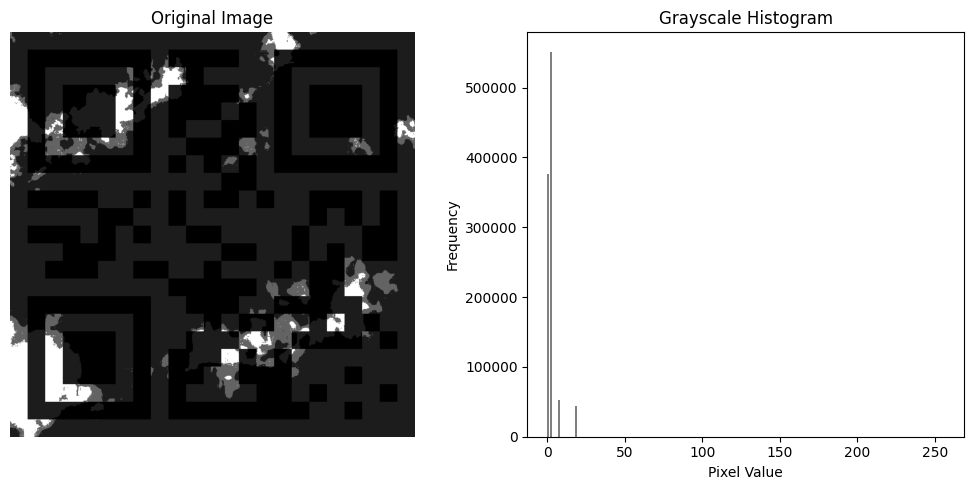

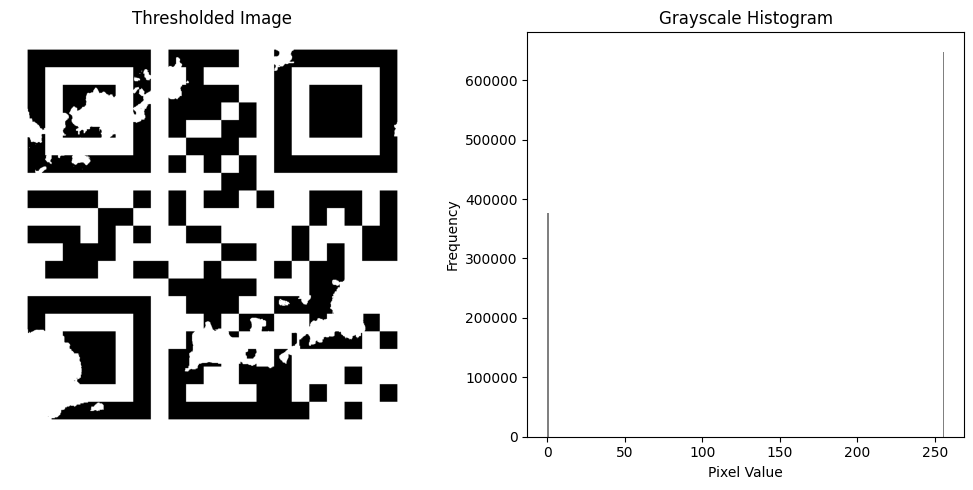

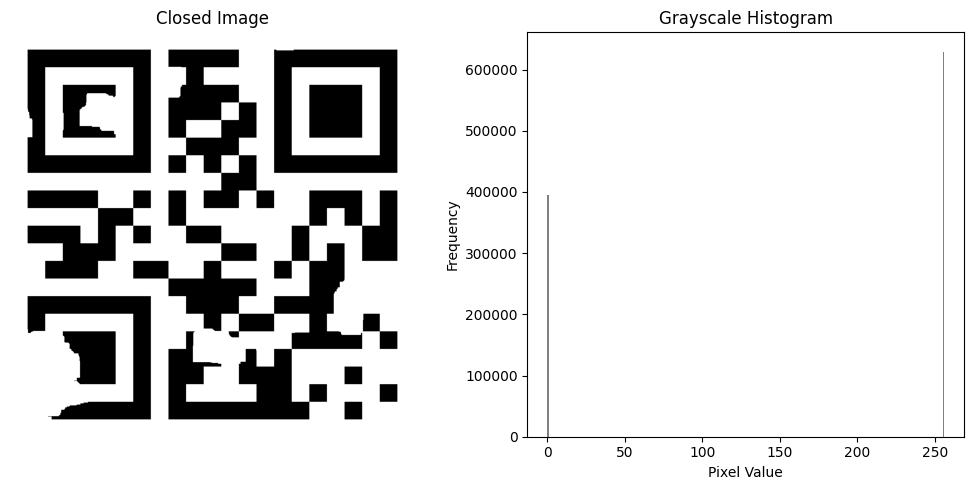

In [58]:
def tc13_preprocessing(img):
    # Calculate the histogram
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])

    # Plot the histogram
    #plt.plot(hist, color='gray')

    # Apply histogram equalization
    equlaized_image = cv2.equalizeHist(img)

    # Calculate the new histogram
    hist = cv2.calcHist([equlaized_image], [0], None, [256], [0, 256])

    # Find the unique pixel values
    unique_values = np.unique(equlaized_image)

    # Print the unique pixel values
    #print("Unique pixel values:", unique_values) #0 217 238 255

    # Modify those values
    # 217->255 , 238->255
    #equlaized_image[equlaized_image == 255] = 0
    equlaized_image[equlaized_image == 217] = 255
    equlaized_image[equlaized_image == 238] = 255

    # Apply opening (equivelant to closing) 
    kernel = np.ones((41,41),np.uint8)
    closing = cv2.morphologyEx(equlaized_image, cv2.MORPH_OPEN, kernel)

    printing_dict = {
        'Original Image': img,
        'Thresholded Image': equlaized_image,
        'Closed Image': closing
    }

    return printing_dict


image = cv2.imread('images/13-2el-noor-2ata3.png', cv2.IMREAD_GRAYSCALE)

printing_dict = tc13_preprocessing(image)

plot_all_needed_images(printing_dict)

### Test case 14

#### What this case needs?
* Case 14 needs mainly three things.
* First, the background banana needs to be removed.
* Second, detecting the outline of the qr-code.
* Third, we need to apply perspective transfrom to fit the qr-code to a square.

#### What was done?
* Here we applied thresholding to get rid of the background.
* Then we applied hough and processed the right approximate contour.
* Then we applied perpective transform to map the edge vertices of the contour to the refrence target vertices (obtained from test case 1).

#### What could be improved?
* qr-code can be rotated slightly to ease decoding.

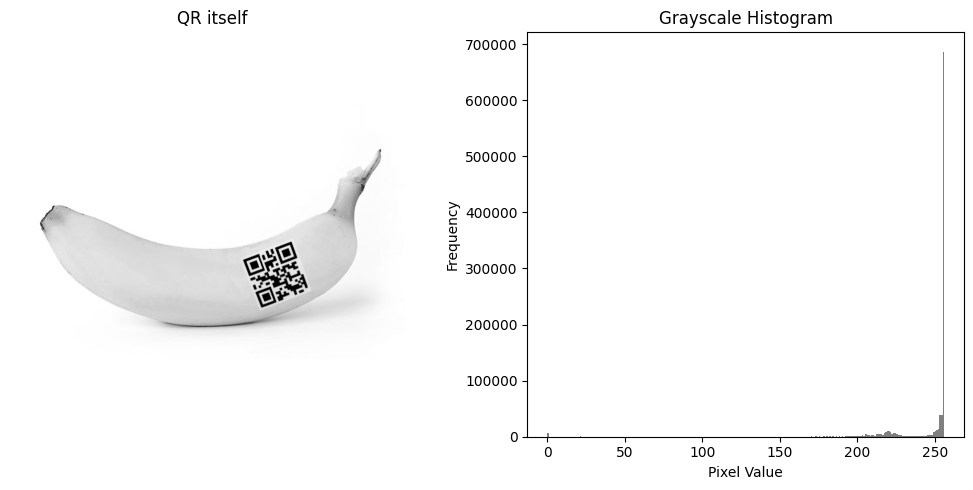

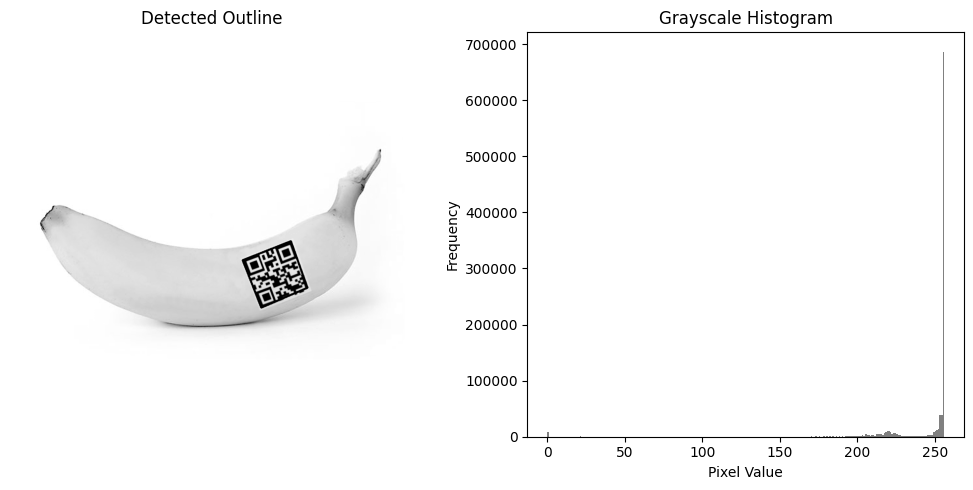

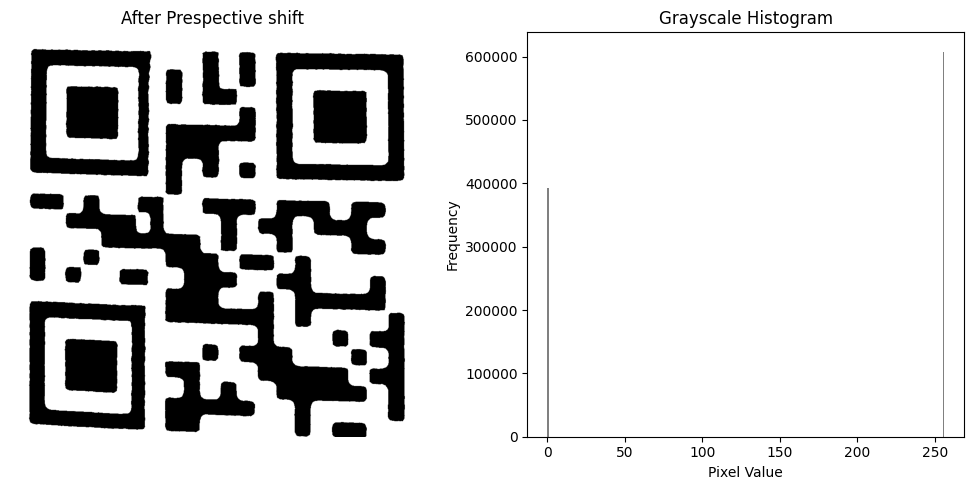

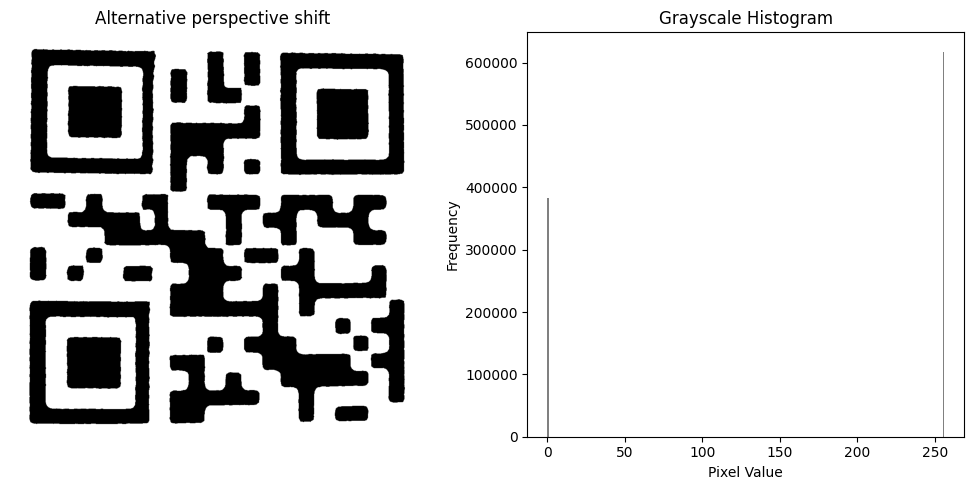

In [168]:
# Testcase 14 #
def tc14_preprocessing(original_img):

    # Threshold the image to remove banana
    _, thresh_img = cv2.threshold(original_img, 90, 255, cv2.THRESH_BINARY)
    # Find Hough
    hough_lines_14 = get_hough(thresh_img)
    # Find the approximate Contour
    exact,appx = get_contour(hough_lines_14)
    # print(appx)
    # cv2.circle(original_img, appx.reshape(-1, 2)[2], radius=10, color=(0, 0, 0), thickness=-1)
    # Draw approximate Contour
    cont_img = original_img.copy()
    if appx is not None:
        cv2.drawContours(cont_img, [appx], -1, (0, 0, 0), 4) 
    # Fitting the QR code into a square

    # Target verticies (Base image verticies)
    target_verticies = np.array([[967,42], [42,42], [42,967], [967,967]], dtype= np.float32)

    warped_image = shift_perspective(original_img, appx, target_verticies)

    # Apply thresholding
    _, thresh_shifted_img = cv2.threshold(warped_image, 60, 255, cv2.THRESH_BINARY)

############################## arkam tanya lel target
    target_verticies_tany = np.array([[967,42], [42,42], [42,967], [967,920]], dtype= np.float32)

    warped_image_tany = shift_perspective(original_img, appx, target_verticies_tany)

    # Apply thresholding
    _, thresh_shifted_img_tany = cv2.threshold(warped_image_tany, 60, 255, cv2.THRESH_BINARY)

    

    # ######################### Applying rotation #########################
    # # Padd the image
    # padding = 10
    # padded_img = cv2.copyMakeBorder(thresh_shifted_img, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=(255,255,255))
    # # Find Hough
    # hough_lines_correction = get_hough(padded_img)
    # # Find Contour
    # exact_correction,appx_correction = get_contour(hough_lines_correction)
    # # print(appx_correction)
    # cont_img_correction = padded_img.copy()
    # if appx_correction is not None:
    #     cv2.drawContours(cont_img_correction, [appx_correction], -1, (0, 0, 0), 4)

    
    # # print(appx_correction.reshape(-1, 2))
    # # Draw the point on the image
    # cv2.circle(thresh_shifted_img, appx_correction.reshape(-1, 2)[2], 10, (0,0,0), -1)

    # # Find angle between contour side and y-axis 
    # p1 = find_point_with_xMminYMax(appx_correction.reshape(-1, 2))
    # p2 = find_point_with_yMax(appx_correction.reshape(-1, 2))
    # cv2.circle(warped_image, p1, 10, (0,0,0), -1)
    # vector = p2-p1
    # angle = find_angle(vector) 
    # # Rotate the image
    # rotated_img = rotate_img_clockwise(padded_img, angle)
    # ret, thresh = cv2.threshold(rotated_img, 170, 255, cv2.THRESH_BINARY)

    # #####################################################################
    
    # Construct the printing dictionary
    printing_dict = {
        'QR itself': original_img,
        'Detected Outline' : cont_img,
        'After Prespective shift' : thresh_shifted_img,
        'Alternative perspective shift': thresh_shifted_img_tany
    }
    # print(angle)
    # cv2.imwrite(os.path.join('./images', '14-solved-2.png'), thresh_shifted_img_tany)
    return printing_dict

img_14 = cv2.imread('./images/14-BANANAAA!!!.png', cv2.IMREAD_GRAYSCALE)
dict_14 = tc14_preprocessing(img_14)
plot_all_needed_images(dict_14)

### Test case 15

#### What this case needs?
* Case 15 needs mainly two things.
* First, it needs to be thresholded to remove the background.
* Second, we need to apply median blur to remove the noise caused by the wood in the back ground.

#### What was done?
* Here we applied thresholding to remove the background.
* Then we applied median blur to remove the noise caused by the wood in the background.

#### What could be improved?
* The main callenge would be decoding this testcase as a large portion of the qr-code is removed.

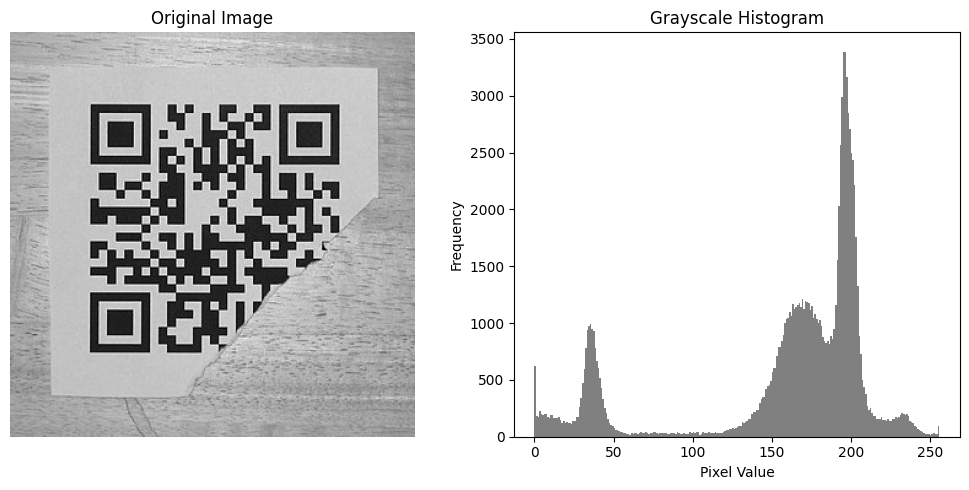

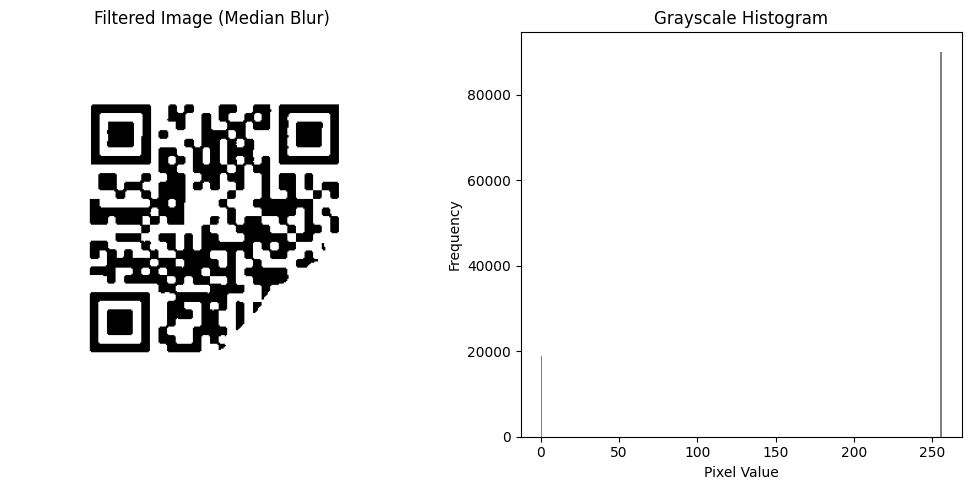

In [64]:
def tc15_preprocessing(image):
    _, thresholded_img = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY)

    filtered_img = cv2.medianBlur(thresholded_img, 3)

    printing_dict = {
        'Original Image': image,
        'Filtered Image (Median Blur)': filtered_img
    }

    return printing_dict


img = cv2.imread('images/15-beast-mode-computer-vision-(this-one-is-from-wikipedia).jpg', cv2.IMREAD_GRAYSCALE)

printing_dict = tc15_preprocessing(img)

plot_all_needed_images(printing_dict)

### Test case 16

#### What this case needs?
* Case 16 needs to detect the outline of the qr-code.

#### What was done?
* Here we detected the outline of the image using hough transfrom and choosing the right contour.

#### What could be improved?
* This case is yet to be decoded which is the main challenge.

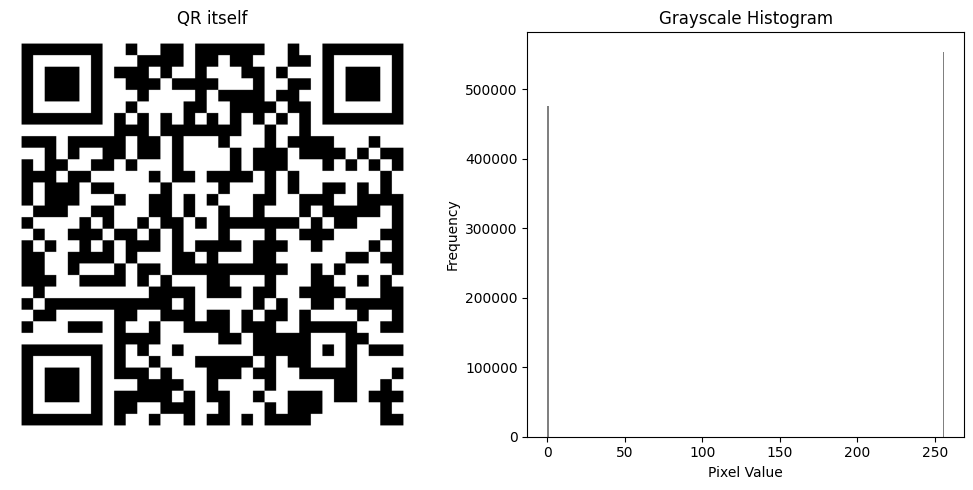

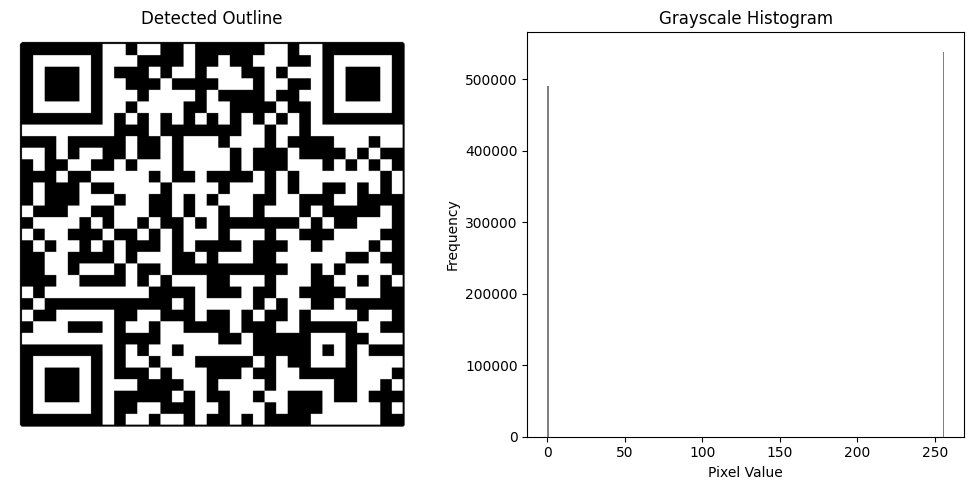

In [65]:
def tc16_preprocessing(original_img):
    
    # Find Hough
    hough_lines_16 = get_hough(original_img)
    # Find Contour
    exact,appx = get_contour(hough_lines_16)
    # Draw contour
    cont_img = original_img.copy()
    if exact is not None:
        cv2.drawContours(cont_img, [exact], -1, (0, 0, 0), 4) 

    # Construct the printing dictionary
    printing_dict = {
        'QR itself': original_img,
        'Detected Outline' : cont_img
    }
    return printing_dict
    
img_16 = cv2.imread('images/16-V3-QR-Code...-can-you-do-it.png', cv2.IMREAD_GRAYSCALE)
dict_16 = tc16_preprocessing(img_16)
plot_all_needed_images(dict_16)